# Assignment 4: Movie Review Analysis [50 Pt]

In this assignment, we will build a recurrent neural network to work with sequential text data, specificially, movie review data to identify the reviewer sentiment. In the process of completing this assignment, you will:
    
1. Clean and process text data for machine learning.
2. Perform tokenization of text data.
3. Understand and implement a word-level recurrent neural network.
4. Implement batching of text data using a DataLoader before training a recurrent neural network.
5. Understand how to apply pretrained models for transfer learning in natural language processing projects.

### What to submit

Submit an HTML file containing all your code, outputs, and write-up
from parts A and B. You can produce a HTML file directly from Google Colab. The Colab instructions are provided at the end of this document.

**Do not submit any other files produced by your code.**

Include a link to your colab file in your submission.

Please use Google Colab to complete this assignment. If you want to use Jupyter Notebook, please complete the assignment and upload your Jupyter Notebook file to Google Colab for submission.

## Colab Link

Include a link to your Colab file here. If you would like the TA to look at your Colab file in case your solutions are cut off, **please make sure that your Colab file is publicly accessible at the time of submission.**

In [ ]:
# TO BE COMPLETED

https://colab.research.google.com/drive/1y3__sZs_3W6NyjpFQFZ2d17iRT0iMIcz#scrollTo=_bphECiUa9zw

# PART A - Sentiment Analysis

In this part we will construct a world-level LSTM model for identifying positive and negative reviews. This will be done in a similar way to what was shared in the preparation code for Assignment 4.

In [1]:
# load standard modules/libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# load special modules/libraries
import os
import warnings
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

from collections import Counter
import string
import re
from tqdm  import tqdm

# load pytorch modules/libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import TensorDataset,DataLoader


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Part 1. Data Cleaning [5 pt]

We will be using the "IMDB Movie Review Dataset" provided on the course website. Download "IMDB Dataset.csv" into your Colab workspace.

### Part (i) [1pt EXPLORATORY]

Open up the file in Python, and examine some examples of positive and negative reviews. Comment on the quality of the data and any challenges you foresee in working with these data. Pick one example of a positive review and one of a negative review to support your comments.

In [2]:
# download IMDB review data

# load dataset
df = pd.read_csv("IMDB Dataset.csv")

# process into data and labels
X = df['review'].values
y = df['sentiment'].values


In [ ]:
print("Review:\n",X[16],"\n\nType:",y[16])

Review:
 Some films just simply should not be remade. This is one of them. In and of itself it is not a bad film. But it fails to capture the flavor and the terror of the 1963 film of the same title. Liam Neeson was excellent as he always is, and most of the cast holds up, with the exception of Owen Wilson, who just did not bring the right feel to the character of Luke. But the major fault with this version is that it strayed too far from the Shirley Jackson story in it's attempts to be grandiose and lost some of the thrill of the earlier film in a trade off for snazzier special effects. Again I will say that in and of itself it is not a bad film. But you will enjoy the friction of terror in the older version much more. 

Type: positive


In [ ]:
# TO BE COMPLETED
print("Review:\n",X[3],"\n\nType:",y[3])

Review:
 Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them. 

Type: negative


In [ ]:
'''
Firstly, as we can see from review 16, the comment talks about positive sides (most of the cast holds up),
and also negative sides (lost some of the thrill of the earlier film) of the movie, as we can see, the comment
is neutral, but it was still classify as a positive review, this may cause troubles when the model learns keywords
from the sentiment types.

Secondly, from the review 3, we can observe some characters without meanings like '<br />', and words with all
capitalized letters 'BOOGEYMAN', the data may need further cleaning and the words may need to be standardized
before training.

'''


### Part (ii) [1pt EXPLORATORY]

Perform summary statistics on the dataset. What is the average character length of a review? What are the lengths of the longest and shortest reviews?

How many positive reviews and negative reviews are there. Generate a histogram to compare the average character length for positive and negative reviews. Comment on the differences in positive and negative reviews and how that may affect the model you will be using later.

In [ ]:
# TO BE COMPLETED
n=[]
for i in range(len(X)):
    n.append(len(X[i]))
print("Average character length with spaces:",np.mean(n))

print("Length of the longest review:",np.max(n))

print("Length of the shortest review:",np.min(n))


po=[]
ne=[]
for i in range(len(X)):
    if y[i]=='positive':
        po.append(len(X[i]))
    elif y[i]=='negative':
        ne.append(len(X[i]))
print("Number of positive reviews:",len(po))

print("Number of negative reviews:",len(ne))

Average character length with spaces: 1309.43102
Length of the longest review: 13704
Length of the shortest review: 32
Number of positive reviews: 25000
Number of negative reviews: 25000


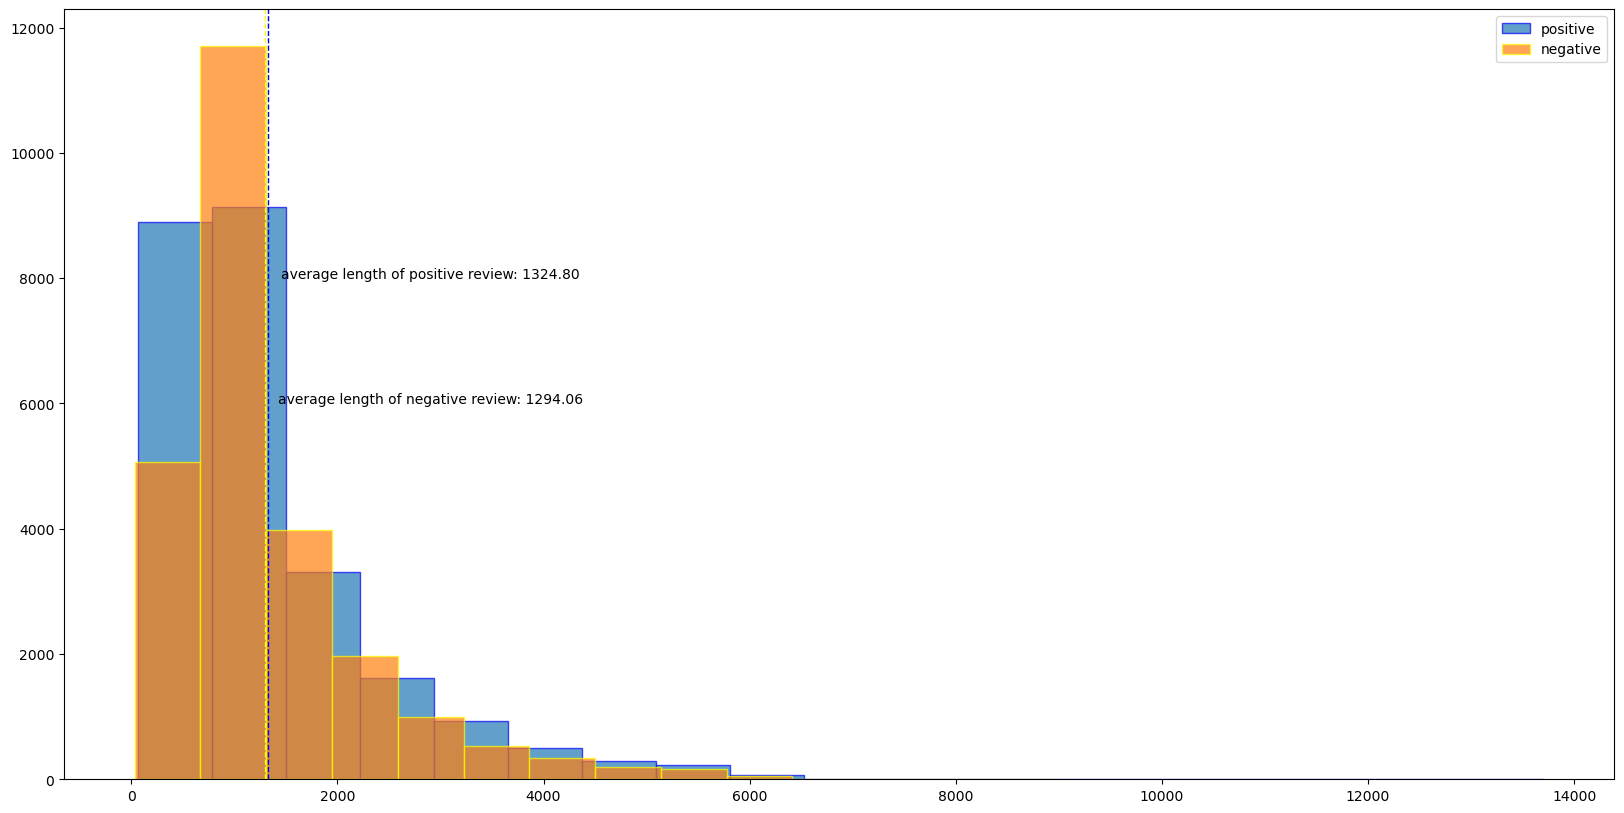

In [ ]:
# plotting first histogram
plt.figure(figsize=(20,10))
plt.hist(po, label='positive', bins=19, alpha=.7, edgecolor='blue')
plt.axvline(np.mean(po), color='blue', linestyle='dashed', linewidth=1)
plt.text(np.mean(po)*1.1, 8000, 'average length of positive review: {:.2f}'.format(np.mean(po)))
# plotting second histogram
plt.hist(ne, label="negative", bins=14, alpha=.7, edgecolor='yellow')
plt.axvline(np.mean(ne), color='yellow', linestyle='dashed', linewidth=1)
plt.text(np.mean(ne)*1.1, 6000, 'average length of negative review: {:.2f}'.format(np.mean(ne)))
plt.legend()

# Showing the plot using plt.show()
plt.show()

In [ ]:
'''

General observations :

Average character length with spaces: 1309.43102
Length of the longest review: 13704
Length of the shortest review: 32
Number of positive reviews: 25000
Number of negative reviews: 25000

Observations positive vs negative:
The dataset is balanced, with 25000 positive and negative reviews, from the plot, average
length of positive and negative review is very closed, 1324 vs 1294.

'''


### Part (iii) [1pt EXPLORATORY]

The following helper code will be used to process the data before we can train our LSTM model. In point form comment on what processing steps are performed in the code provided below and why these steps are necessary or beneficial to training and LSTM.

In [6]:
X[0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [7]:
def preprocess_string(str1):
    # remove all non-word characters excluding number and letters
    str1= re.sub(r"[^\w\s]",'',str1)
    # remove all whitespace with no space
    str1= re.sub(r"\s",'',str1)
    # replace digits with no space
    str1= re.sub(r"\d",'',str1)
    return str1

def preprocess_sentence(sen1):
    word_list=[]
    stop_word = set(stopwords.words("english"))
    for word in sen1.lower().split():
        word = preprocess_string(word)
        if word not in stop_word and word!='':
            word_list.append(word)
    return word_list

def get_stoi(data):
    word_list=[]
    for review in data:
        word_list.extend(preprocess_sentence(review))
    corpus = Counter(word_list)
    print(corpus.get)
    # sorting on the basis of most common words
    corpus_ =sorted(corpus,key= corpus.get,reverse=True)[:1000]
    # creating a dict
    stoi =  {ch:i+1 for i,ch in enumerate(corpus_)}
    return stoi

def tokenize(data, labels, stoi):
    # tokenize
    data_encoded = []
    for review in data:
        data_encoded.append([stoi[word] for word in preprocess_sentence(review)
                                     if word in stoi.keys()])

    labels_encoded = [1 if label =='positive' else 0 for label in labels]

    return data_encoded, np.array(labels_encoded)

def padding_(sentences, seq_len):
    features = np.zeros((len(sentences), seq_len),dtype=int)
    for ii, review in enumerate(sentences):
        if len(review)!=0:
            features[ii, -len(review):] = np.array(review)[:seq_len]

    return features

In [ ]:
'''
preprocess_string:
remove non-word characters, white spaces and digits
- we want to remove meaningless character from words to reduce noise in model training

preprocess_sentence: For each word in the sentence, do:
• convert the word into lower case
• apply preprocess_string
• return the words that are not in stop_words(words with no meaning, like "the", "at", "on")
- lower case conversion and removing stop words are esssential steps to improve data quality

get_stoi:
• For each review in the dataset, apply preprocess_sentence.
• Count the frequency of each word
• Sort the word frequency from high to low, and select the most common 1000 words
• Create a dictionary, map one word to one index, the more common words are in lower indices.
- to get most common words, we may be able to learn which words are likely to appear in negative reviews,
and which are likely to be seen in positive reviews, it can further help the model in classify new data.

tokenize:
• tokenize the words
• encode the labels into 0 and 1 instead of negative and positive
- classification model needs an output label of 0 and 1

padding_:
• batch the reviews into desired length
- put the data into specific batch size is required when we want to feed the data into neural network.

'''


### Part (iv) [1pt EXPLORATORY]

Split the dataset into `train`, `valid`, and `test`. Use a 60-20-20 split. Then apply the above processing steps to prepare your data for training.

Set the padding of the reviews to 500.

In [8]:
stoi = get_stoi(X)
X_encoded, y_encoded = tokenize(X, y, stoi)
X_pad = padding_(X_encoded, 500)

<built-in method get of Counter object at 0x792dcdde37e0>


In [9]:
X_pad.shape

(50000, 500)

In [10]:
def split_data(X_pad,y_encoded):
    train, valid, test = [], [], []
    for i, line in enumerate(X_pad):

        # place the data set in either the training, validation, or test set
        if i % 5 < 3:
            train.append((line, y_encoded[i])) # 60% training
        elif i % 5 == 4:
            valid.append((line, y_encoded[i])) # 20% validation
        else:
            test.append((line, y_encoded[i])) # 20% test
    return train, valid, test

In [11]:
train, valid, test = split_data(X_pad,y_encoded)

In [12]:
len(train)

30000

### Part (v) [1pt EXPLORATORY]

Create a DataLoader that will allow you to load the training and validation data in mini-batches. Then generate a dataset of batch size of 16 to verify that the DataLoader works as intended.

In [ ]:
# TO BE COMPLETED
train_loader = torch.utils.data.DataLoader(train, batch_size=16, shuffle=True)

for x,labels in train_loader:
    print(x.shape)
    print(labels.shape)
    break



torch.Size([16, 500])
torch.Size([16])


In [ ]:
valid_loader = torch.utils.data.DataLoader(valid, batch_size=16, shuffle=True)

for x,labels in valid_loader:
    print(x.shape)
    print(labels.shape)
    break

torch.Size([16, 500])
torch.Size([16])


In [ ]:
len(valid_loader)

625

In [ ]:
for x,labels in valid_loader:
    print(x.shape)
    emb = nn.Embedding(1001, 50)
    x = emb(x)
    print(x.shape)
    print(labels.shape)
    break

torch.Size([16, 500])
torch.Size([16, 500, 50])
torch.Size([16])


## Part 2. Model Building [2pt MODEL]

Build a recurrent neural network model, using an architecture of your choosing. Use one or more fully-connected layers to make the prediction based on your recurrent network output.

Instead of using the RNN output value for the final token, another often used strategy is to max-pool over the entire output array. That is, instead of calling something like:

```
out, _ = self.rnn(x)
self.fc(out[:, -1, :])
```

where `self.rnn` is an `nn.RNN`, `nn.GRU`, or `nn.LSTM` module, and `self.fc` is a
fully-connected
layer, we use:

```
out, _ = self.rnn(x)
self.fc(torch.max(out, dim=1)[0])
```

This works reasonably in practice. An even better alternative is to concatenate the max-pooling and average-pooling of the RNN outputs:

```
out, _ = self.rnn(x)
out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
self.fc(out)
```

We encourage you to try out all these options. The way you pool the RNN outputs is one of the "hyperparameters" that you can choose to tune later on.

In [13]:
# TO BE COMPLETED

# class SentimentRNN(nn.Module):
#     def __init__(self, n_input, n_hidden=256, n_layers=2):
#         super(SentimentRNN, self).__init__()
#         self.name='SentimentRNN'
#         # RNN layer
#         self.rnn = nn.LSTM(n_input, n_hidden, n_layers)

#         self.fc = nn.Linear(2 , 2)


#     def forward(self, x):

#         # TO BE COMPLETED

#         out, _ = self.rnn(x)
#         # print(out.shape)#16*256
#         # print(torch.max(out, dim=1)[0].shape)#16
#         # print(torch.mean(out, dim=1).shape)#16
#         # out = torch.cat([torch.max(out, dim=1)[0].unsqueeze(1),
#         #          torch.mean(out, dim=1).unsqueeze(1)], dim=1)
#         print(out.shape)#16*2
#         # out = self.fc(out)
#         self.fc(out[:, -1, :])
#         # print(out.shape)
#         return out

class SentimentRNN(nn.Module):
    def __init__(self, n_input, hidden_size=50):
        super(SentimentRNN, self).__init__()
        self.name='SentimentRNN'
        # create embedding for input
        self.emb = nn.Embedding(1001, n_input)
        self.hidden_size = hidden_size
        # feed into RNN
        self.rnn = nn.RNN(n_input, hidden_size, batch_first=True)
        # feed into fully-connect
        self.fc = nn.Linear(hidden_size*2, 2)


    def forward(self, x):

        # create embedding for input
        # print(x.shape)
        x = self.emb(x) #16, 500, n_input
        # set initial hidden state
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        # Forward propagate the RNN
        out, _ = self.rnn(x, h0)
        # concatenate the max-pooling and average-pooling
        out = torch.cat([torch.max(out, dim=1)[0],
                 torch.mean(out, dim=1)], dim=1)
        out = self.fc(out)
        return out




## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

In [14]:
def get_accuracy(model, data_loader):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED


    correct, total = 0, 0
    for reviews, labels in data_loader:
        # print(reviews.shape)
        # print(reviews.dtype)
        # print(labels.dtype)
        output = model(reviews)
        # print(output)

        pred = output.max(1, keepdim=True)[1]
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
    return correct / total



In [ ]:
model = SentimentRNN(60,50)
get_accuracy(model, valid_loader)

0.4978

### Part (ii) [1pt MODEL]

Train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [15]:
def get_model_name(name, batch_size, learning_rate, epoch):
    """ Generate a name for the model consisting of all the hyperparameter values

    Args:
        config: Configuration object containing the hyperparameters
    Returns:
        path: A string with the hyperparameter name and value concatenated
    """
    path = "model_{0}_bs{1}_lr{2}_epoch{3}".format(name,
                                                   batch_size,
                                                   learning_rate,
                                                   epoch)
    return path

In [ ]:
# TO BE COMPLETED

def train_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5,batch=16):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        for reviews, labels in train_loader:
            optimizer.zero_grad()
            # reviews = reviews.to(torch.float32)
            pred = model(reviews)
            loss = criterion(pred, labels)

            loss.backward()
            optimizer.step()

        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader))
        valid_acc.append(get_accuracy(model, valid_loader))
        model_path = get_model_name(model.name, batch, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
                epoch+1, loss, train_acc[-1], valid_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()





Epoch 1; Loss 0.714841; Train Acc 0.561567; Val Acc 0.544500
Epoch 2; Loss 0.699031; Train Acc 0.647333; Val Acc 0.634100
Epoch 3; Loss 0.729540; Train Acc 0.666267; Val Acc 0.656900
Epoch 4; Loss 0.577147; Train Acc 0.676000; Val Acc 0.666200
Epoch 5; Loss 0.632012; Train Acc 0.681433; Val Acc 0.669900


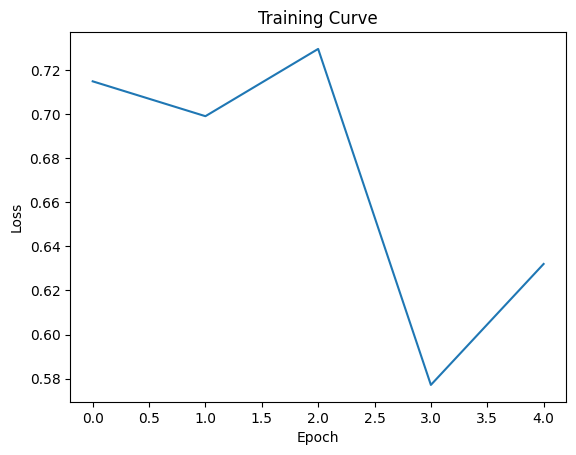

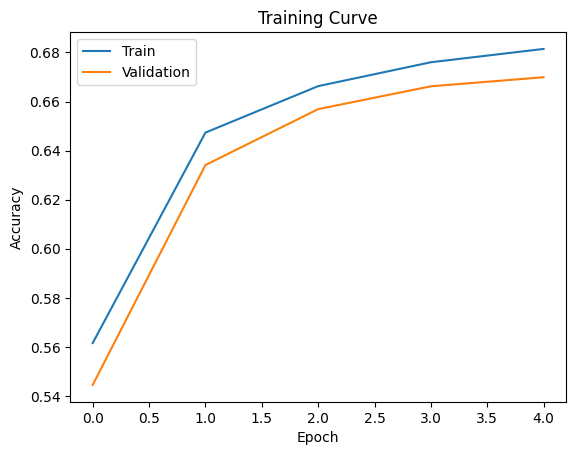

In [ ]:
# TO BE COMPLETED
model = SentimentRNN(50,50)
train_network(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5)


### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters.
You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

In [ ]:
'''
I choose hyperparameters of: learning_rate, num_epochs, batch size, hidden_size.
batch size, n_input, hidden_size are unrelated to optimizer.

Train1. From the first train, we can see that validation accuracy continues to
increase until the last epoch, so I increase the number of epoch.
At the same time, I choose another hidden_size of 20
Train2. The model learns slowly and behaves worse than the previous,
try to increase hidden size instead, and increased learning rate.
Train3. The model performs much better, now I try to increase
hidden size further, with 15 epochs.
Train4. The previous model with 80 hidden size, 1e-4 learning rate and epoch 15
has the highest validation accuracy, now I try out a different batch size of 80
to see if it improves performance.
Train5. The last model with increased batch size has similar accuracy,
but does not outperform the previous one. The speed of convergence is slower
when we increase batch size, try a lower batch of 40.
Train6. The performance does not differ much when we decrease batch size,
accuracy is similar to the previous one.
From the above, the best model has batch size of 16, learning rate 1e-4, best
accuracy achieve at epoch 14, Loss 0.149868; Train Acc 0.879800; Val Acc 0.846500
'''

From the first train, we can see that validation accuracy continues to increase until the last epoch, so I increase the number of epoch.
At the same time, I choose another hidden_size of 20

Epoch 1; Loss 0.703179; Train Acc 0.519733; Val Acc 0.512400
Epoch 2; Loss 0.691752; Train Acc 0.522400; Val Acc 0.515200
Epoch 3; Loss 0.702251; Train Acc 0.536433; Val Acc 0.531300
Epoch 4; Loss 0.684195; Train Acc 0.529200; Val Acc 0.524300
Epoch 5; Loss 0.722540; Train Acc 0.526567; Val Acc 0.519600
Epoch 6; Loss 0.686597; Train Acc 0.526767; Val Acc 0.522500
Epoch 7; Loss 0.674729; Train Acc 0.527667; Val Acc 0.523400
Epoch 8; Loss 0.678380; Train Acc 0.544900; Val Acc 0.541600
Epoch 9; Loss 0.697474; Train Acc 0.544933; Val Acc 0.538300
Epoch 10; Loss 0.708690; Train Acc 0.564500; Val Acc 0.556500


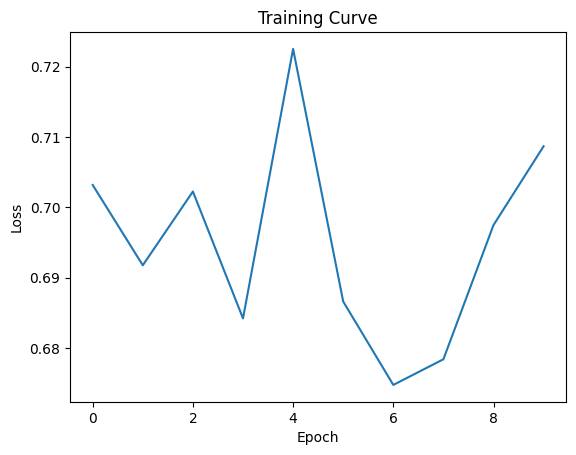

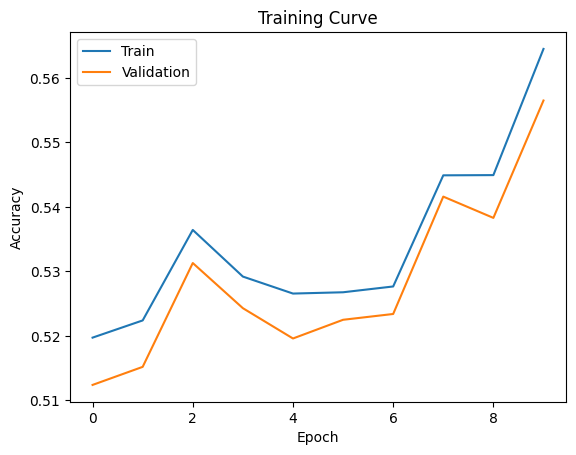

In [ ]:
model = SentimentRNN(50,20)
train_network(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-5)

The model learns slowly and behaves worse than the previous, try to increase hidden size instead, and increased learning rate.

Epoch 1; Loss 0.619057; Train Acc 0.664233; Val Acc 0.657900
Epoch 2; Loss 0.489864; Train Acc 0.710467; Val Acc 0.703800
Epoch 3; Loss 0.582345; Train Acc 0.772400; Val Acc 0.763000
Epoch 4; Loss 0.546072; Train Acc 0.796033; Val Acc 0.784500
Epoch 5; Loss 0.443907; Train Acc 0.820633; Val Acc 0.805700
Epoch 6; Loss 0.485500; Train Acc 0.825667; Val Acc 0.813800
Epoch 7; Loss 0.230913; Train Acc 0.841233; Val Acc 0.827700
Epoch 8; Loss 0.401788; Train Acc 0.846967; Val Acc 0.829100
Epoch 9; Loss 0.243798; Train Acc 0.848400; Val Acc 0.829300
Epoch 10; Loss 0.189229; Train Acc 0.857433; Val Acc 0.837100


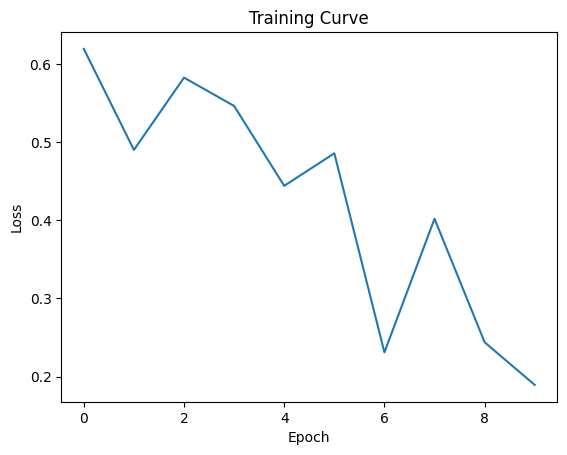

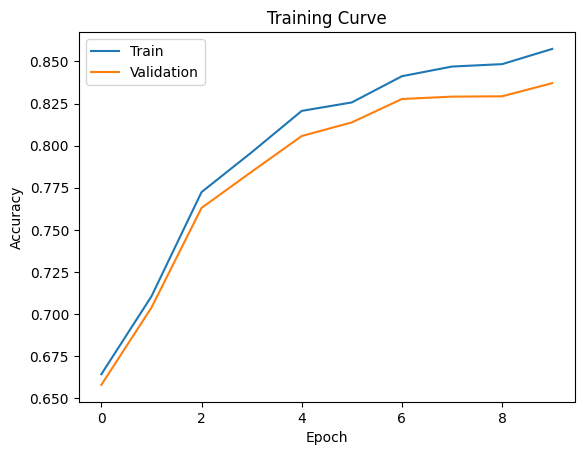

In [ ]:
model = SentimentRNN(50,70)
train_network(model, train_loader, valid_loader, num_epochs=10, learning_rate=1e-4)

The model performs much better, now I try to increase hidden size further, with 15 epochs.

Epoch 1; Loss 0.638891; Train Acc 0.699300; Val Acc 0.685200
Epoch 2; Loss 0.486891; Train Acc 0.759367; Val Acc 0.748100
Epoch 3; Loss 0.345163; Train Acc 0.801967; Val Acc 0.793000
Epoch 4; Loss 0.531076; Train Acc 0.820567; Val Acc 0.806000
Epoch 5; Loss 0.343858; Train Acc 0.837633; Val Acc 0.820200
Epoch 6; Loss 0.632477; Train Acc 0.839600; Val Acc 0.822000
Epoch 7; Loss 0.362927; Train Acc 0.849233; Val Acc 0.829000
Epoch 8; Loss 0.535905; Train Acc 0.855033; Val Acc 0.833900
Epoch 9; Loss 0.330921; Train Acc 0.861300; Val Acc 0.837100
Epoch 10; Loss 0.581786; Train Acc 0.861033; Val Acc 0.837800
Epoch 11; Loss 0.417919; Train Acc 0.869900; Val Acc 0.842100
Epoch 12; Loss 0.208274; Train Acc 0.868500; Val Acc 0.837600
Epoch 13; Loss 0.320365; Train Acc 0.876000; Val Acc 0.846000
Epoch 14; Loss 0.149868; Train Acc 0.879800; Val Acc 0.846500
Epoch 15; Loss 0.415128; Train Acc 0.882967; Val Acc 0.846300


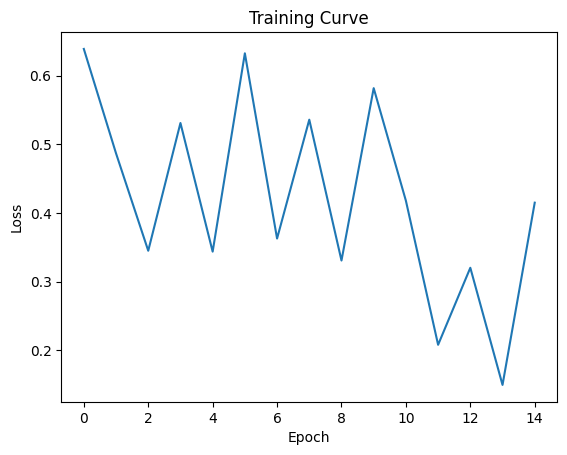

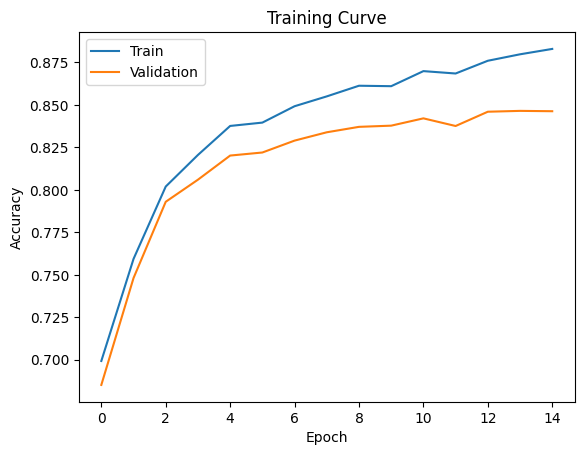

In [ ]:
model = SentimentRNN(50,80)
train_network(model, train_loader, valid_loader, num_epochs=15, learning_rate=1e-4)

The previous model with 80 hidden size, 1e-4 learning rate and epoch 15 has the highest validation accuracy, now I try out a different batch size of 80 to see if it improves performance.

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=80, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=80, shuffle=True)

Epoch 1; Loss 0.688231; Train Acc 0.593533; Val Acc 0.582300
Epoch 2; Loss 0.667783; Train Acc 0.666167; Val Acc 0.649300
Epoch 3; Loss 0.609501; Train Acc 0.707000; Val Acc 0.703100
Epoch 4; Loss 0.574799; Train Acc 0.732100; Val Acc 0.728700
Epoch 5; Loss 0.577093; Train Acc 0.765567; Val Acc 0.762100
Epoch 6; Loss 0.450946; Train Acc 0.783767; Val Acc 0.776000
Epoch 7; Loss 0.467337; Train Acc 0.804700; Val Acc 0.796400
Epoch 8; Loss 0.449690; Train Acc 0.814667; Val Acc 0.804300
Epoch 9; Loss 0.381979; Train Acc 0.819400; Val Acc 0.806700
Epoch 10; Loss 0.405634; Train Acc 0.827100; Val Acc 0.810900
Epoch 11; Loss 0.289068; Train Acc 0.831633; Val Acc 0.821000
Epoch 12; Loss 0.342078; Train Acc 0.833100; Val Acc 0.816800
Epoch 13; Loss 0.225490; Train Acc 0.841800; Val Acc 0.826300
Epoch 14; Loss 0.276198; Train Acc 0.845133; Val Acc 0.827800
Epoch 15; Loss 0.317858; Train Acc 0.848433; Val Acc 0.829000


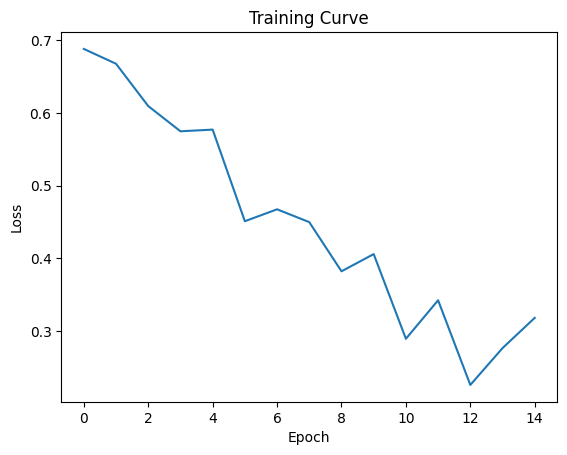

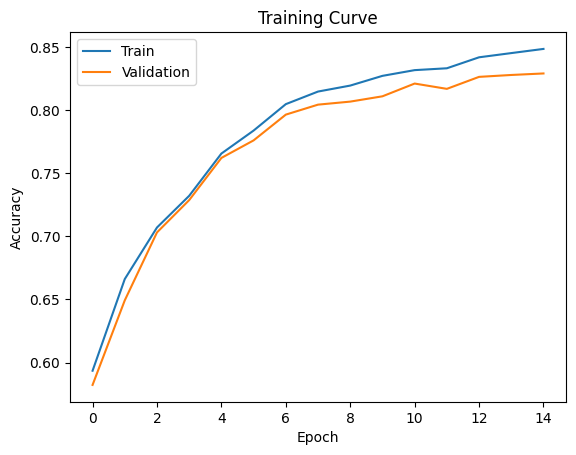

In [ ]:
model = SentimentRNN(50,80)
train_network(model, train_loader, valid_loader, num_epochs=15, learning_rate=1e-4, batch=80)

The speed of convergence is slower when we increase batch size, the performance of this model is similar but a little bit wrose than the previous one, try a lower batch of 40.

In [ ]:
train_loader = torch.utils.data.DataLoader(train, batch_size=40, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=40, shuffle=True)

Epoch 1; Loss 0.679704; Train Acc 0.574733; Val Acc 0.572600
Epoch 2; Loss 0.611578; Train Acc 0.661033; Val Acc 0.661900
Epoch 3; Loss 0.592902; Train Acc 0.729867; Val Acc 0.727900
Epoch 4; Loss 0.451810; Train Acc 0.770300; Val Acc 0.763800
Epoch 5; Loss 0.615146; Train Acc 0.776867; Val Acc 0.770300
Epoch 6; Loss 0.535086; Train Acc 0.802533; Val Acc 0.794400
Epoch 7; Loss 0.375473; Train Acc 0.807733; Val Acc 0.796300
Epoch 8; Loss 0.469397; Train Acc 0.817200; Val Acc 0.806000
Epoch 9; Loss 0.504557; Train Acc 0.819600; Val Acc 0.805100
Epoch 10; Loss 0.337243; Train Acc 0.834333; Val Acc 0.818500
Epoch 11; Loss 0.476624; Train Acc 0.838800; Val Acc 0.820800
Epoch 12; Loss 0.389546; Train Acc 0.834333; Val Acc 0.816900
Epoch 13; Loss 0.294438; Train Acc 0.845300; Val Acc 0.826200
Epoch 14; Loss 0.316891; Train Acc 0.852567; Val Acc 0.829300
Epoch 15; Loss 0.318900; Train Acc 0.854533; Val Acc 0.830300


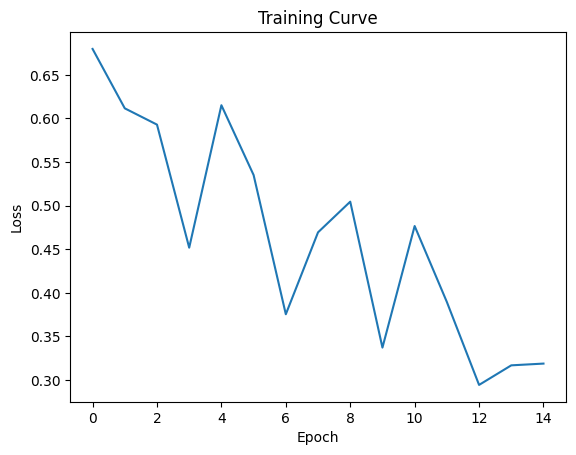

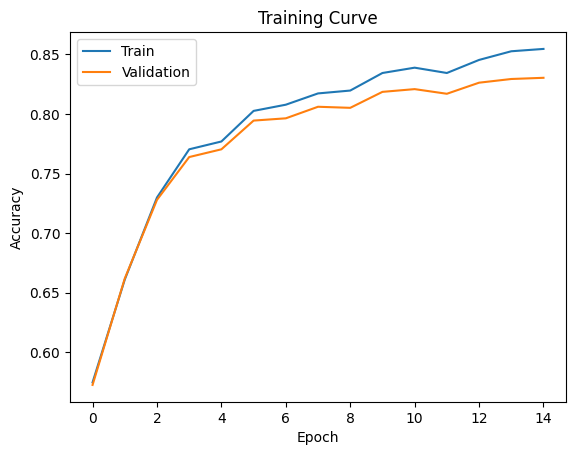

In [ ]:
model = SentimentRNN(50,80)
train_network(model, train_loader, valid_loader, num_epochs=15, learning_rate=1e-4, batch=40)

The performance does not differ much when we decrease batch size.
The best model has batch size of 16, learning rate 1e-4, best
accuracy achieve at epoch 14, Loss 0.149868; Train Acc 0.879800; Val Acc 0.846500

## Part 4. Evaluation [10 pt]

**Important**. At this point in the assignment your test data should not have been evaluated by any of your models. The test data should be evaluated only after you have finished all the previous parts of the assignment. Once you evaluate your models on the test data you cannot change your models or else you may make hyperparameter adjustments that could lead to overfitting to the test data.

### Part (i) [3pt RESULT]

Report the final test accuracy of your model. Comment on how the result compares with accuracy obtained on the training and validation data. Are the results what you expected? Explain.

In [16]:
# TO BE COMPLETED
model = SentimentRNN(50,80)
# information stored at epoch ..
model_path = get_model_name(model.name, batch_size=16, learning_rate=1e-4, epoch=13)
state =torch.load(model_path)
model.load_state_dict(state)


test_loader = torch.utils.data.DataLoader(test, batch_size=16)

In [ ]:

correct, total = 0, 0

for reviews, labels in test_loader:

    output = model(reviews)

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
print("Test accuracy of the best model is:",correct / total*100,"%")

Test accuracy of the best model is: 84.06 %


In [ ]:
'''
Test accuracy of the best model is: 84.06 %, compared to Train Acc 0.879800; Val Acc 0.846500
test accuracy is lower than train and validation accuracy.



'''


### Part (ii) [3pt DISCUSSION]

Look over the misclassified samples in the test data and see if you can find any patterns on where the model has difficulty with identifying the review sentiment. Provide up to 5 examples of positive and negative reviews each to support your findings.

In [40]:
_,_,x_test=split_data(X,y)

In [ ]:
labels

tensor([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0])

In [ ]:
# TO BE COMPLETED
i=0
for reviews, labels in test_loader:

    output = model(reviews)
    # print(reviews)
    pred = output.max(1, keepdim=True)[1]
    tensorr=pred.eq(labels.view_as(pred))
    ind=torch.where(tensorr == False)[0]
    for ele in ind.tolist():
      print(x_test[ele+i])
      print("True label:",labels[ele])
      print("Prediction:",pred[ele])
    i+=16




("The cast played Shakespeare.<br /><br />Shakespeare lost.<br /><br />I appreciate that this is trying to bring Shakespeare to the masses, but why ruin something so good.<br /><br />Is it because 'The Scottish Play' is my favorite Shakespeare? I do not know. What I do know is that a certain Rev Bowdler (hence bowdlerization) tried to do something similar in the Victorian era.<br /><br />In other words, you cannot improve perfection.<br /><br />I have no more to write but as I have to write at least ten lines of text (and English composition was never my forte I will just have to keep going and say that this movie, as the saying goes, just does not cut it.", 'negative')
True label: tensor(0)
Prediction: tensor([1])
('One of the most significant quotes from the entire film is pronounced halfway through by the protagonist, the mafia middle-man Titta Di Girolamo, a physically non-descript, middle-aged man originally from Salerno in Southern Italy. When we\'re introduced to him at the star

**Review1**: "Normally I don't like series at all. They're all to predictable and they tend to become boring and dull very fast.These series however, are well played, the story follows through all episodes and even if you miss one, the story will still be catching your mind.The episodes are all filmed on a hospital and takes you further and further in to the mysteries of dark and old secrets that lies just beneath the surface of the mighty hospital."
True label: positive

**Review4**: "Clearly an hilarious movie.It angers me to see the poor ratings given to this piece of comic genius.Please look at this for what it is, a funny, ridiculous enjoyable film. Laugh for christ sake!"
True label: positive

**Review5**: "Looking for a REAL super bad movie? If you wanna have great fun, don't hesitate and check this one! Ferrigno is incredibly bad but is also the best of this mediocrity."
True label: negative

The above reviews shows the cases when the model misclassify based on some keywords. The first review is predicted as negative, in the first sentence, it says "Normally I don't like series at all.", it can be the reason why the prediction type is negative, because the review contains keywords "don't like". The second review is misclassify as negative, but the review is generally written with positive feelings, while the model catches the words "angers", and "poor", while the true purpose of that sentence was defending the moview from some negative ratings. Similarly, in review 5, the true label is negative, but the model looks at some words like "super", "great fun", and the review was misclassify as positive.
We may guess that the model predicts sentiment type based on some key words, but it may not always works.

**Review2**: "Well, there\'s no real plot to speak of, it\'s just an excuse to show some scenes of extreme violence and gratuitous sex (which can sometimes be fun, too, but it\'s not in this case). What else can I say about this...? The action, when happening, is inventive and there\'s a cool scene where two characters are falling from a skyscraper (one that has to be several miles high), but overall there\'s not much to recommend "Kite". Watch it if you want, but you\'re not missing much if you skip this one..."
True label: negative

**Review3**: "Excellent writing and wild cast. The tech is poor but it's obviously very low budget. Looks like they didn't cut the negative but had to release on a video output. In any case one of the most inventive comedies I've seen lately. The screenwriter in particular is fine."
True label: positive

The second review is predicted as positive, and the third review is predicted as negative. There are some similarities in these reviews. They all talk about positive and negative sides of the movie. If we just look at parts of the review, it is very easy to misclassify. While the emphasis falls at the last few words of the review, for review 2, it talks about the "inventive" of the movie but it says "you\'re not missing much if you skip this one" at last; for review 3, it says "The tech is poor but it's obviously very low budget." at first, but "most inventive comedies I've seen lately" at last. It is possible that the model only look at the general wordings, but it fails to recognize the key point of the review, where the author express his true feelings about the movie.


### Part (iii) [2pt RESULT]

What is your model's prediction of the **probability** that
the review message provided below is a positive review?

Hint: You will need to apply the same processing on the review as was done on the the train, val, and test data sets.

In [ ]:
review = " Man.... I wish I loved this movie more than I did. Don't get me wrong,it/'s a solid action movie with jaw-dropping stunts (some of the best in the series),but as a Mission: Impossible movie, it felt like a small step backward for the franchise.Fallout had mind-blowing action sequences and stunt work, along with developing Ethan's relationship with Ilsa, providing closure with Julia, showing the lengths Ethan would go to protect those closest to him, and battling an imposing villain. Dead Reckoning: Part One stretches the movie across two films only to seemingly showcase action spectacle after action spectacle while sacrificing character development. Characters I have grown to love over a decade of films felt sidelined, ignored, or wasted. Hayley Atwell's new character chewed up most of the screen time, and while she was fantastic, I wanted to see more of the original team. The new villain had an inconsistent ability that confused more than intimidated. There were some important emotional moments that I just didn't feel the weight of when I definitely should have. Part Two might tie everything together and make me enjoy Part One more in retrospect, but unfortunately, I left wanting more from this one. "



In [ ]:
# TO BE COMPLETED
# preprocess the review with stoi we have
r_encoded, _ = tokenize([review], [0], stoi)
r_pad = padding_(r_encoded, 500)
r_pad

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [ ]:
from scipy.special import softmax
# get output from preprocessed review
output = model(torch.tensor(r_pad))
# calculate probability by softmax
print("probability to positive:",softmax((output[0]).detach().numpy())[1])
# prediction
pred = output.max(1, keepdim=True)[1]
print("label:",pred[0].numpy()[0])

probability to positive: 0.7932126
label: 1


### Part (iv) [2pt DISCUSSION]

Do you think that detecting positive and negative reviews is an easy or difficult task?

Since machine learning models are expensive to train and deploy, it is very
important to compare our models against baseline models: a simple
model that is easy to build and inexpensive to run that we can compare our
recurrent neural network model against.

Explain how you might build a simple baseline model. This baseline model
can be a simple neural network (with very few weights), a hand-written algorithm,
or any other strategy that is easy to build and test.

**Do not actually build a baseline model. Instead, provide instructions on
how to build it.**

In [ ]:
'''
Sentiment detection should not be a difficult task, if we can obtain a clean and
well structured dataset.

Simple baseline model:
After similiar data preprocessing steps like tokenization and remove stop words,
we can use TF-IDF to convert word frequency to matrix and perform feature
selection, like what we did in get_stoi function. Then we can choose a simple
machine learning model like logistic or SVM to perform sentiment analysis.

This should be a less complex model compared to RNN, using a simple baseline
model, we can compare the performance of our simple model and complex model,
and we can decide if the complex model significantly outperforms the simple one.
If the complex model does not significantly outperform the simple one,
it suggests that the task is not difficult and we may only need a simple model
to solve it.

'''

# PART B - Transfer Learning

For many natural language processing tasks, it is generally not a good idea to train a very large deep neural network model from scratch due to enormous compute requirements and lack of sufficient amounts of training data. Instead, you should always try to take advantage of an existing model that performs similar tasks as the one you need to solve.

In this part of the assignment we will be using pretrained models to improve the performance on identifying positive and negative reviews. There are several pretrained models that are available to us, here we will use a pretrained BERT model that comes with the hugging face transformer library.

Provided below is sample code to get you started. For more details please visit the hugging face tutorial on using pretrained models using PyTorch: https://huggingface.co/docs/transformers/training

#### Sample Code

In [29]:
# install relevant libraries
!pip install -qq transformers

In [30]:
# load relevant libraries
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)


tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [31]:
sample_txt = 'I want to learn how to do sentiment analysis using BERT and tokenizer.'

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [ ]:
encoding['input_ids']

tensor([[  101,   146,  1328,  1106,  3858,  1293,  1106,  1202, 17024,  3622,
          1606,   139,  9637,  1942,  1105, 22559, 17260,   119,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0]])

In [ ]:
encoding['attention_mask']

tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)


768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In the sample code provided we loaded a short text sequence, tokenized it using the same tokenization that was used in the pretrained BERT model, and fed the tokenized input into the BERT model to obtain the embeddings.

The model output consists of two forms of embeddings:
- **hidden_states** are the final layer of outputs that has a shape sequence_length x embeddings, much like the hidden states of a recurrent neural network
- **pooled_output** is the result of applying max pooling on the hidden states to effectively collapse the sequence dimenension and ensure the same output size for any given sequence before feeding into the classification stage

Note that you can preprocess all of the data prior to training a classifier stage for sentiment analysis to help speed up the training process. This is no different from the process we applied in an earlier assignment using AlexNet and image data.

## Part 1. Data Loading [5 pt]

We will be using the same "IMDB Movie Review Dataset" that we used earlier. Reload the data and complete Part B of the assignment. You should be able to complete part B independently from Part A.

### Part (i) [1pt EXPLORATORY]

Provided below is a DataLoader for your training and test datasets so you can iterate over batches of data. Run the DataLoader to create your training, validation, and test data.

In [25]:
from torch.utils.data import Dataset, DataLoader

class MovieReviewDataset(Dataset):

  def __init__(self, reviews, targets, tokenizer, max_len):
    self.reviews = reviews
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len

  def __len__(self):
    return len(self.reviews)

  def __getitem__(self, item):
    review = str(self.reviews[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      review,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
      truncation = True
    )

    return {
      'review_text': review,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [26]:
df_shuffle = df.sample(frac = 1,random_state=1517)
df_shuffle=df_shuffle.replace({'sentiment': {'negative': 0, 'positive': 1}})
df_shuffle

,review,sentiment
7545,"The clever marketeer is he is, Jess Franco nat...",0
12642,this is the worst film I've seen in a long lon...,0
13951,"weird.this is a TV movie,yet the rating on the...",0
27343,"Yes, it can be done. John De Bello and Costa D...",0
24595,I caught a bit of this concert on public telev...,1
...,...,...
19398,Why???? What a disgusting joke of a supposed m...,0
43342,Mention Bollywood to anyone with a slight fami...,1
33293,"A typical 70s Italian coming of age film, orig...",0
47287,I watched this last night with low expectation...,1


In [27]:
df_train = df_shuffle.iloc[:30000,:]
df_val = df_shuffle.iloc[30000:40000,:]
df_test = df_shuffle.iloc[40000:,:]

In [32]:
# prepare data loaders
MAX_LEN = 150
BATCH_SIZE = 8

#training data
train_data = MovieReviewDataset(reviews=df_train['review'].to_numpy(),
                                targets=df_train['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

train_data_loader = DataLoader(train_data, batch_size = BATCH_SIZE, num_workers = 2) #modify num_works as needed

#validation data

val_data = MovieReviewDataset(reviews=df_val['review'].to_numpy(),
                                targets=df_val['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

valid_data_loader = DataLoader(val_data, batch_size = BATCH_SIZE, num_workers = 2)

#test data
test_data = MovieReviewDataset(reviews=df_test['review'].to_numpy(),
                                targets=df_test['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = 4)




### Part (ii) [1pt EXPLORATORY]

Use the **train_data_loader** to load one sample. What are the different attributes provided with the sample and how are they used?

In [ ]:
# iter through loader
# Load one

for i in iter(train_data_loader):
  print(i)
  break



/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

{'review_text': ['Not only was he invariably annoying to listen to, but he had NO jokes. I swear, some fobby Asian guy telling yo momma jokes would\'ve been funnier than Leary\'s crap. (Well, maybe funny for a couple minutes but at least I\'ll be able to laugh at least once!) Leary claimed he stopped taking drugs during one of his "jokes"... apparently he was still high on something; he was just some crackhead imprecating rants mostly drug related. One of his jokes was something like, \'I wouldn\'t use crack, especially having the same name as between my ass\' - Oh man, how did he come up with that one?! I swear the only guy that needs to shut the f**k up is Denis Leary. Thank god I didn\'t have to see him live. This guy totally sucks.<br /><br />If you\'re easily amused by swearing, and "jokes" where you can come up with yourself, then waste your time with this junk.', 'How many fricken\' times do we have to see a spook walking by in the background & peaking through a mirror\'s reflec

In [ ]:
'''

There are four attributes within one load:

'review_text': original review text
'input_ids': is a tensor of encoded input text, with consecutive non-zero numbers
and consecutive 0s.
'attention_mask': is a vector with same length of input_ids, '1' indicating
actual content values in input_ids, 0 indicating 0s in input_ids
'targets': true sentiment label of the review text

'''

### Part (iii) [1pt EXPLORATORY]

Determine the range of values for the tokens in the training data. How are the tokens obtained?

Hint: You can apply your intuition here, or do some additional research to find how the "bert-base-cased" tokenization is done.

In [ ]:
# TO BE COMPLETED
range_token=[100,0]
for i in iter(train_data_loader):
  enc = i['input_ids']
  min_token = torch.min(enc).item()
  max_token = torch.max(enc).item()
  if min_token < range_token[0]:
    range_token[0] = min_token
  if max_token > range_token[1]:
    range_token[1] = max_token
print(range_token)


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.war

[0, 28466]


In [ ]:
'''
The range of values for the tokens in the training data: [0, 28466]

The values are obtained through pretrained BertTokenizer, the words in the text
are converted to numbers

'''

### Part (iv) [1pt EXPLORATORY]

Generate histograms of all the token values in the training data. Repeat for the validation and test data. What are the top 5 occuring tokens in the training_dataset? What do these tokens represent?

In [ ]:
# TO BE COMPLETED
token_count = np.zeros((28467,), dtype=int)

# iterate through each loader
for i in iter(train_data_loader):
  enc = i['input_ids']
  for j in range(16): # iterate through each text
    for v in enc[j].numpy(): # iterate through each token
      token_count[v]+=1 # count token value occurance
token_count

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

array([4291358,       0,       0, ...,       0,       0,       1])

In [ ]:
print("Top 5 occuring tokens in training set:",sorted(range(len(token_count)), key=lambda i: token_count[i])[-6:-1])

Top 5 occuring tokens in training set: [1105, 170, 117, 1103, 119]


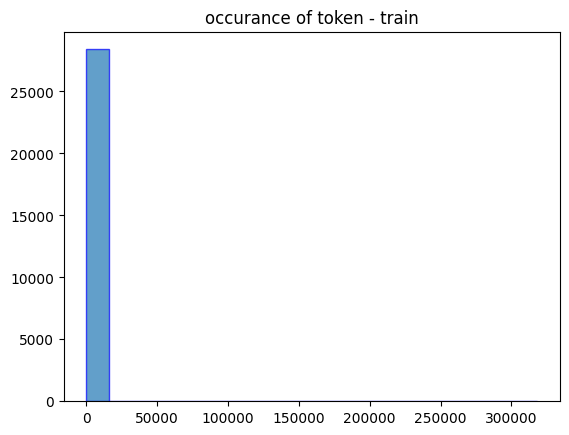

In [ ]:

plt.hist(token_count[1:], bins=20, alpha=.7, edgecolor='blue')
plt.title("occurance of token - train")
plt.show()

In [ ]:
token_count1 = np.zeros((28467,), dtype=int)

# iterate through each loader
for i in iter(valid_data_loader):
  enc = i['input_ids']
  for j in range(16): # iterate through each text
    for v in enc[j].numpy(): # iterate through each token
      token_count1[v]+=1 # count token value occurance
print("Top 5 occuring tokens in validation set:",sorted(range(len(token_count1)), key=lambda i: token_count1[i])[-6:-1])

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.war

Top 5 occuring tokens in validation set: [1105, 170, 117, 1103, 119]


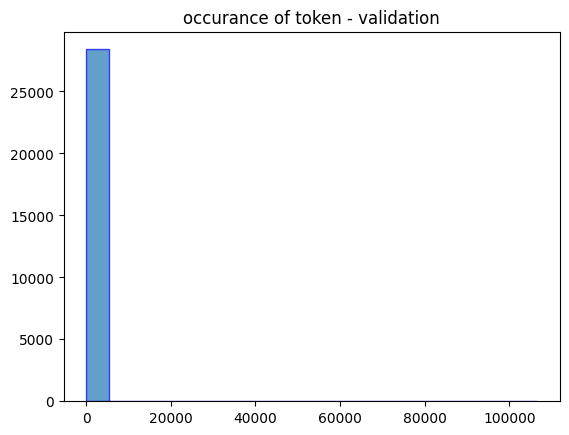

In [ ]:
plt.hist(token_count1[1:], bins=20, alpha=.7, edgecolor='blue')
plt.title("occurance of token - validation")
plt.show()

In [ ]:
token_count2 = np.zeros((28467,), dtype=int)

# iterate through each loader
for i in iter(test_data_loader):
  enc = i['input_ids']
  for j in range(16): # iterate through each text
    for v in enc[j].numpy(): # iterate through each token
      token_count2[v]+=1 # count token value occurance
print("Top 5 occuring tokens in test set:",sorted(range(len(token_count2)), key=lambda i: token_count2[i])[-6:-1])

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

Top 5 occuring tokens in test set: [1105, 170, 117, 1103, 119]


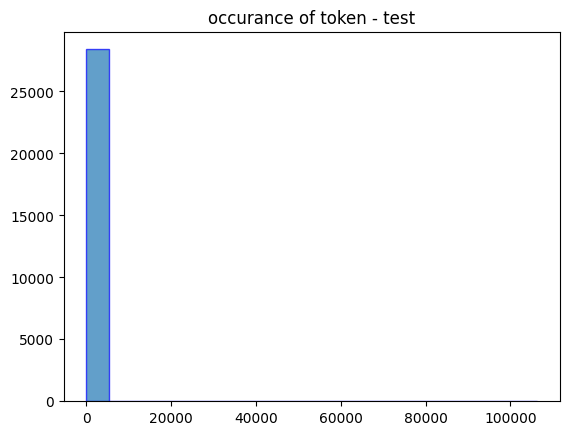

In [ ]:
plt.hist(token_count2[1:], bins=20, alpha=.7, edgecolor='blue')
plt.title("occurance of token - test")
plt.show()

In [ ]:
print("top 5 occurance count of tokens in train:",token_count[119],token_count[1103],token_count[117],token_count[170],token_count[1105])
print("top 5 occurance count of tokens in valid:",token_count1[119],token_count1[1103],token_count1[117],token_count1[170],token_count1[1105])
print("top 5 occurance count of tokens in test:",token_count2[119],token_count2[1103],token_count2[117],token_count2[170],token_count2[1105])

top 5 occurance count of tokens in train: 318075 276277 260433 154212 150913
top 5 occurance count of tokens in valid: 106510 92151 86299 50848 49913
top 5 occurance count of tokens in test: 106293 92359 86491 51239 50327


In [ ]:


print("token 119 represents:",tokenizer.decode(119))
print("token 1103 represents:",tokenizer.decode(1103))
print("token 117 represents:",tokenizer.decode(117))
print("token 170 represents:",tokenizer.decode(170))
print("token 1105 represents:",tokenizer.decode(1105))


token 119 represents: .
token 1103 represents: t h e
token 117 represents: ,
token 170 represents: a
token 1105 represents: a n d


In [ ]:
'''
Top 5 tokens in three sets are all: [1105, 170, 117, 1103, 119]
top 5 occurance count of tokens in train: 318075 276277 260433 154212 150913
top 5 occurance count of tokens in valid: 106510 92151 86299 50848 49913
top 5 occurance count of tokens in test: 106293 92359 86491 51239 50327


The top occurance tokens in three sets are skip words like "the", "a", "and",
and punctuations like "." and ",".



'''

### Part (v) [1pt EXPLORATORY]

Select a single sample from your training DataLoader and feed it through the **bert_model** to obtain the hidden_states and pooled_output. Briefly describe what each tensor dimension represents and what affects the size of each dimension.

In [ ]:
# TO BE COMPLETED
for i in iter(train_data_loader):
  # extracts the first review in first batch in train loader
  enc = i['input_ids'][0]
  mask= i['attention_mask'][0]
  print("Review:",i['review_text'][0])
  break

sample_txt = i['review_text'][0]

encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
  truncation = True
)

hidden_states = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[0]
pooled_output = bert_model(input_ids=encoding['input_ids'],
                           attention_mask=encoding['attention_mask'])[1]

print(hidden_states)
print(pooled_output)

/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.war

Review: I loved the gorgeous Greek scenery but the story, which is not something you can follow anyway, was even harder to follow in the movie. I cannot imagine how anyone watching the movie can get any kind of grip on it if they have not read the book, and then, like me, they would probably wonder why Australian Allison turned into French Anne, and many other seemingly pointless changes in the story. The mysteries in the book seemed to be chopped up or left out in the movie. I saw it when it first came out and had the same problems with it then, since I had read the book several times. I recently watched it with my granddaughter (very intelligent at 20 and usually into movies I like) who was mostly amazed at how young Michael Caine and Candace Bergen were in it, but otherwise could not imagine why one would watch it except for the scenery.


/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


tensor([[[ 0.6474,  0.1063, -0.1529,  ..., -0.0934,  0.2974,  0.0428],
         [ 0.5138, -0.5501,  0.3614,  ..., -0.0511, -0.0956,  0.3605],
         [-0.1430, -0.0450, -0.1477,  ...,  0.4045, -0.4181, -0.1756],
         ...,
         [ 0.3539,  0.0516, -0.2951,  ...,  0.3784, -0.1531,  0.5885],
         [ 0.5304, -0.1947, -0.1938,  ...,  0.1811, -0.0706,  0.0582],
         [ 1.4605, -0.1442, -0.7617,  ...,  0.4432, -0.0278,  0.2467]]],
       grad_fn=<NativeLayerNormBackward0>)
tensor([[-6.5383e-01,  4.0195e-01,  9.9986e-01, -9.9430e-01,  9.6798e-01,
          8.9049e-01,  9.8716e-01, -9.9110e-01, -9.7037e-01, -6.1158e-01,
          9.7531e-01,  9.9849e-01, -9.9787e-01, -9.9977e-01,  7.9348e-01,
         -9.7819e-01,  9.8804e-01, -5.3963e-01, -9.9996e-01, -8.6006e-01,
         -6.5240e-01, -9.9987e-01,  2.0650e-01,  9.7361e-01,  9.7895e-01,
          4.1147e-02,  9.8295e-01,  9.9997e-01,  8.7171e-01, -3.9390e-02,
          3.3360e-01, -9.8870e-01,  7.3828e-01, -9.9864e-01,  2.2155e-0

In [ ]:
hidden_size = bert_model.config.hidden_size

print(hidden_size)
print(hidden_states.shape)
print(pooled_output.shape)

768
torch.Size([1, 32, 768])
torch.Size([1, 768])


In [ ]:
'''
hidden_states and pooled output are obtained above, the shape are:
torch.Size([1, 32, 768])
torch.Size([1, 768])

The first dimension of hidden states is the number of text, or the batch size;
the second dimension of hidden states is max_length defined by tokenizer;
the third dimension is hidden size defined by bert model.

The first dimension of pooled output is the number of text, or the batch size;
the second dimension is hidden size defined by bert model.


'''

## Part 2. Model Architecture [2 pt]

### Part (i) [1pt MODEL]

Prepare a review classifier model that builds on the pooled output from the Bert model to identify positive and negative reviews.

In [23]:
class SentimentClassifierPooled(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierPooled, self).__init__()
    self.name='SentimentClassifierPooled'
    '''
    read bert model output from presaved array
    and feed the pooled output to fully connect layers
    '''
    # self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.fc = nn.Sequential(
            nn.Linear(768,256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256,2),
        )

  def forward(self, x):
    # pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[1]
    # print(pooled_output.shape)

    out = self.fc(x)
    # print(out.shape)
    return out


### Part (ii) [1pt MODEL]

Construct the architecture for a review classifier model that uses the last hidden output from the Bert model to identify positive and negative reviews.

In [24]:
class SentimentClassifierLast(nn.Module):
#hidden_states are the final layer of outputs that has a shape sequence_length x
#embeddings, much like the hidden states of a recurrent neural network
  def __init__(self, n_classes):
    super(SentimentClassifierLast, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.fc = nn.Linear(1536, n_classes)

    # TO BE COMPLETED

  def forward(self, input_ids, attention_mask):
    print("model start")
    hidden_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[0]
    print(hidden_output.shape)
    out = torch.cat([torch.max(hidden_output, dim=1)[0],
                 torch.mean(hidden_output, dim=1)], dim=1)
    print(out.shape)
    out = self.fc(out)
    print(out.shape)
    return out

    # TO BE COMPLETED


## Part 3. Training [3 pt]

### Part (i) [1pt MODEL]

Complete the `get_accuracy` function, which will compute the
accuracy (rate) of your model across a dataset (e.g. validation set).

**save bert model output in numpy array for training and get accuracy**

In [14]:
from transformers import BertModel, BertConfig
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_outputs = []  # List to store pooled outputs

for i in iter(train_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_outputs.append(output.detach().cpu().numpy())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [15]:
np.save('pooled_out.npy', pooled_outputs)    # .npy extension is added if not given
pout = np.load('pooled_out.npy')
pooled_outputs == pout

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [27]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_out_val = []  # List to store pooled outputs

for i in iter(valid_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_out_val.append(output.detach().cpu().numpy())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

In [28]:
np.save('pooled_out_val.npy', pooled_out_val)    # .npy extension is added if not given
pout_val = np.load('pooled_out_val.npy')
pooled_out_val == pout_val

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [33]:
# load bert pooled output
pout = np.load('pooled_out.npy')
pout_val = np.load('pooled_out_val.npy')

In [13]:
def get_accuracy(model, data, pool_out):
    """ Compute the accuracy of the `model` across a dataset `data`

    Example usage:

    >>> model = MyRNN() # to be defined
    >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
    """

    # TO BE COMPLETED
    correct, total = 0, 0
    i=0
    for k in iter(data):
        labels = k['targets']
        out = pool_out[i]
        # print(out.shape)
        # print("feed into model")

        # read bert output from presaved
        bert_out = torch.from_numpy(out)
        output = model(bert_out)
        # print(output.shape)

        # print(labels.shape)

        pred = output.max(1, keepdim=True)[1]
        # print(pred.shape)
        correct += pred.eq(labels.view_as(pred)).sum().item()
        total += labels.shape[0]
        i+=1
        # print(correct/total)
    return correct / total


In [ ]:
# def get_accuracy(model, data):
#     """ Compute the accuracy of the `model` across a dataset `data`

#     Example usage:

#     >>> model = MyRNN() # to be defined
#     >>> get_accuracy(model, valid_loader) # the variable `valid_loader` is from above
#     """

#     # TO BE COMPLETED
#     correct, total = 0, 0
#     for i in iter(data):
#         # print("load batch")
#         # extracts the first review in first batch in train loader
#         enc = i['input_ids']
#         mask= i['attention_mask']
#         labels = i['targets']
#         print("feed into model")
#         # print(reviews.shape)
#         # print(reviews.dtype)
#         # print(labels.dtype)
#         output = model(enc,mask)
#         # print(output.shape)
#         # print(output)

#         pred = output.max(1, keepdim=True)[1]
#         # print(pred.shape)
#         correct += pred.eq(labels.view_as(pred)).sum().item()
#         total += labels.shape[0]
#         # print(correct/total)
#     return correct / total



In [ ]:
model = SentimentClassifierPooled(2)
get_accuracy(model, train_data_loader)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

0.4997666666666667

In [17]:
model = SentimentClassifierPooled(2)
get_accuracy(model, train_data_loader)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

0.49573333333333336

### Part (ii) [1pt MODEL]

Write a function **train_model** to train your model. Plot the training curve of your final model.
Your training curve should have the training/validation loss and
accuracy plotted periodically.

In [28]:
# TO BE COMPLETED

def train_model(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5,batch=16):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        i=0
        for k in iter(train_loader):

            # enc = i['input_ids']
            # mask= i['attention_mask']
            labels = k['targets']
            # read bert output from presaved
            out = pout[i]
            bert_out = torch.from_numpy(out)
            pred = model(bert_out)
            print(pred.shape)
            print(labels.shape)
            # pred = model(enc,mask)
            optimizer.zero_grad()
            loss = criterion(pred, labels)

            loss.backward()
            optimizer.step()
            i+=1

        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader,pout))
        valid_acc.append(get_accuracy(model, valid_loader,pout_val))
        model_path = get_model_name(model.name, batch, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
                epoch+1, loss, train_acc[-1], valid_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()





Epoch 1; Loss 0.638524; Train Acc 0.617133; Val Acc 0.612800
Epoch 2; Loss 0.620744; Train Acc 0.639600; Val Acc 0.638900
Epoch 3; Loss 0.577310; Train Acc 0.653433; Val Acc 0.646600
Epoch 4; Loss 0.535431; Train Acc 0.660300; Val Acc 0.655800
Epoch 5; Loss 0.555760; Train Acc 0.668267; Val Acc 0.661600


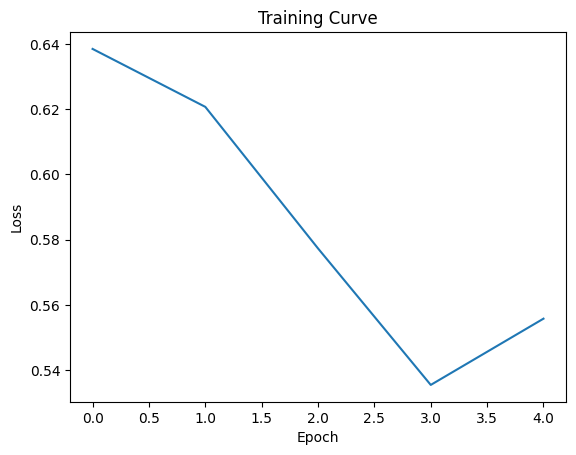

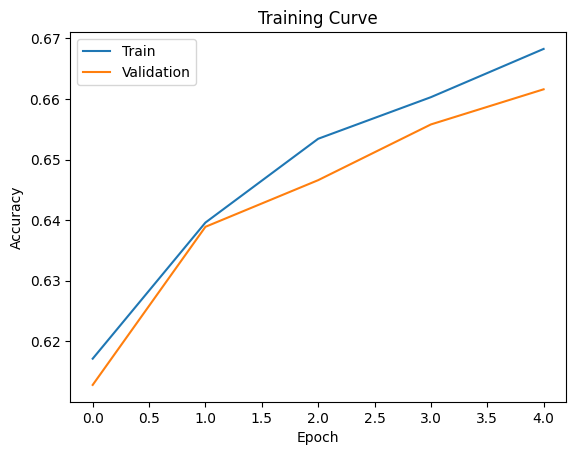

In [39]:
import warnings
warnings.filterwarnings("ignore")
model = SentimentClassifierPooled(2)
train_model(model, train_data_loader, valid_data_loader, num_epochs=5, learning_rate=1e-5,batch=8)

### Part (iii) [1pt MODEL]

Choose at least 4 hyperparameters to tune. Explain how you tuned the hyperparameters. You don't need to include your training curve for every model you trained.
Instead, explain what hyperparemters you tuned, what the best validation accuracy was,
and the reasoning behind the hyperparameter decisions you made.

For this assignment, you should tune more than just your learning rate and epoch.
Choose at least 2 hyperparameters that are unrelated to the optimizer.

**Answer:**
hyperparameters to tune:
learing rate, batch size, number of epoch, number of fully-connected layer

hyperparameters unrelated to optimizer: batch size,  number of epoch

Train1:The first train was slow and there's signs of underfitting, since both train and validation accuracy continues to increase, so I increased epochs and learing rate.

Train2:The best validation accuracy increased when we increased learning rate and number of epochs. Try to increase number of fully-connected layers to three,
to see if it better consilidate information.


Train3:The accuray started to fluctuate from the eighth epoch, one guess is that the learning rate is too large, makes it hard to converge, so I decrease learning rate for the second model.

Train4:The values are still fluctuated at the end, it is possible that the batch size is too small, so there's noises when train, so I increased batch size to 10.
(due to limited available RAM, I cannot increase batch size any further since it
would crash the colab)

Train5: The highest accuracy after increasing batch size is 70.38%

The best model is SentimentClassifierPooled with 2 fully-connected layers, batch size of 8, learning rate of 1e-4, at 12th epoch.

Epoch 12; Loss 0.362141; Train Acc 0.724133; Val Acc 0.713900

The first train was slow and there's signs of underfitting, since both train and validation accuracy continues to increase, so I increased epochs and learing rate.

Epoch 1; Loss 0.532708; Train Acc 0.659333; Val Acc 0.656200
Epoch 2; Loss 0.470777; Train Acc 0.683167; Val Acc 0.673400
Epoch 3; Loss 0.489034; Train Acc 0.689933; Val Acc 0.676400
Epoch 4; Loss 0.546600; Train Acc 0.700100; Val Acc 0.686000
Epoch 5; Loss 0.400053; Train Acc 0.703233; Val Acc 0.692900
Epoch 6; Loss 0.418406; Train Acc 0.710633; Val Acc 0.698700
Epoch 7; Loss 0.383449; Train Acc 0.712700; Val Acc 0.699000
Epoch 8; Loss 0.415879; Train Acc 0.718433; Val Acc 0.707800
Epoch 9; Loss 0.387510; Train Acc 0.716767; Val Acc 0.706600
Epoch 10; Loss 0.402272; Train Acc 0.723400; Val Acc 0.709500
Epoch 11; Loss 0.384763; Train Acc 0.722633; Val Acc 0.710400
Epoch 12; Loss 0.362141; Train Acc 0.724133; Val Acc 0.713900
Epoch 13; Loss 0.393970; Train Acc 0.725133; Val Acc 0.709700
Epoch 14; Loss 0.392025; Train Acc 0.725733; Val Acc 0.712100
Epoch 15; Loss 0.404807; Train Acc 0.724600; Val Acc 0.713700


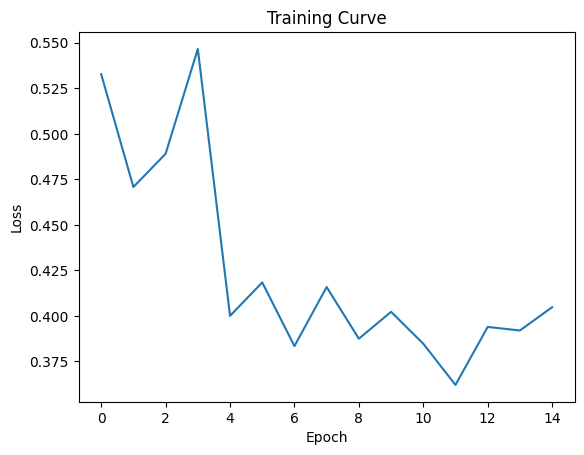

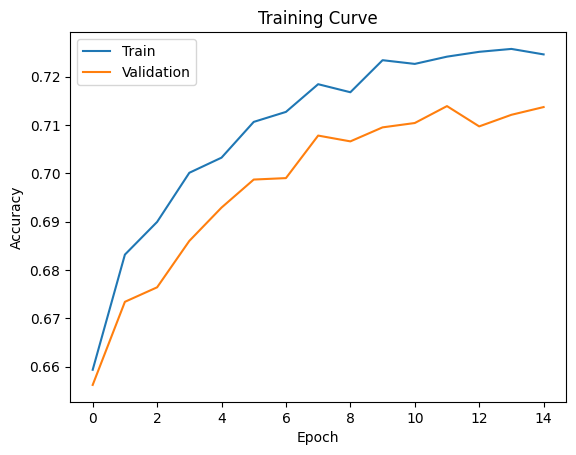

In [42]:
# TO BE COMPLETED
model = SentimentClassifierPooled(2)
train_model(model, train_data_loader, valid_data_loader, num_epochs=15, learning_rate=1e-4,batch=8)

The best validation accuracy increased when we increased learning rate and number of epochs. Try to increase number of fully-connected layers to three, to see if it better consilidate information.

In [19]:
class SentimentClassifierPooled2(nn.Module):

  def __init__(self, n_classes):
    super(SentimentClassifierPooled2, self).__init__()
    self.name='SentimentClassifierPooled2'
    '''
    read bert model output from presaved array
    and feed the pooled output to fully connect layers
    '''
    # self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.fc = nn.Sequential(
            nn.Linear(768,256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256,64),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(64,2),
        )

  def forward(self, x):
    # pooled_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)[1]
    # print(pooled_output.shape)

    out = self.fc(x)
    # print(out.shape)
    return out

Epoch 1; Loss 0.546322; Train Acc 0.633933; Val Acc 0.626800
Epoch 2; Loss 0.583629; Train Acc 0.666833; Val Acc 0.663000
Epoch 3; Loss 0.513744; Train Acc 0.690200; Val Acc 0.677700
Epoch 4; Loss 0.498989; Train Acc 0.700367; Val Acc 0.689500
Epoch 5; Loss 0.393253; Train Acc 0.704800; Val Acc 0.692100
Epoch 6; Loss 0.505120; Train Acc 0.706100; Val Acc 0.694400
Epoch 7; Loss 0.592010; Train Acc 0.712300; Val Acc 0.696500
Epoch 8; Loss 0.451877; Train Acc 0.709467; Val Acc 0.700500
Epoch 9; Loss 0.434096; Train Acc 0.710933; Val Acc 0.697400
Epoch 10; Loss 0.412180; Train Acc 0.719133; Val Acc 0.703400
Epoch 11; Loss 0.473629; Train Acc 0.715200; Val Acc 0.702500
Epoch 12; Loss 0.397214; Train Acc 0.711533; Val Acc 0.703100
Epoch 13; Loss 0.427783; Train Acc 0.704200; Val Acc 0.694100
Epoch 14; Loss 0.413763; Train Acc 0.718033; Val Acc 0.703400
Epoch 15; Loss 0.466021; Train Acc 0.721167; Val Acc 0.703100


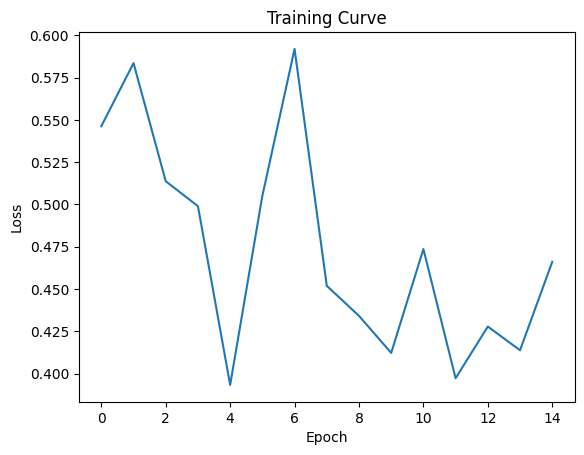

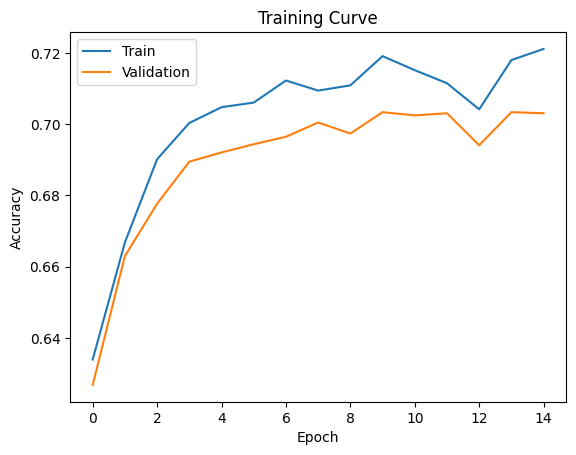

In [20]:
import warnings
warnings.filterwarnings("ignore")
model = SentimentClassifierPooled2(2)
train_model(model, train_data_loader, valid_data_loader, num_epochs=15, learning_rate=1e-4,batch=8)

The accuray started to fluctuate from the eighth epoch, one guess is that the learning rate is too large, makes it hard to converge, so I decrease learning rate for the second model.

Epoch 1; Loss 0.663486; Train Acc 0.594267; Val Acc 0.584200
Epoch 2; Loss 0.600525; Train Acc 0.626767; Val Acc 0.619700
Epoch 3; Loss 0.596768; Train Acc 0.643333; Val Acc 0.633400
Epoch 4; Loss 0.544151; Train Acc 0.653667; Val Acc 0.648700
Epoch 5; Loss 0.566459; Train Acc 0.661700; Val Acc 0.653400
Epoch 6; Loss 0.512606; Train Acc 0.673467; Val Acc 0.666100
Epoch 7; Loss 0.473001; Train Acc 0.683267; Val Acc 0.673100
Epoch 8; Loss 0.471495; Train Acc 0.685533; Val Acc 0.678800
Epoch 9; Loss 0.541807; Train Acc 0.691800; Val Acc 0.683800
Epoch 10; Loss 0.436544; Train Acc 0.699633; Val Acc 0.687400
Epoch 11; Loss 0.445217; Train Acc 0.702600; Val Acc 0.689800
Epoch 12; Loss 0.440275; Train Acc 0.702833; Val Acc 0.693200
Epoch 13; Loss 0.447502; Train Acc 0.708533; Val Acc 0.698100
Epoch 14; Loss 0.428936; Train Acc 0.708467; Val Acc 0.695900
Epoch 15; Loss 0.421864; Train Acc 0.708233; Val Acc 0.696600


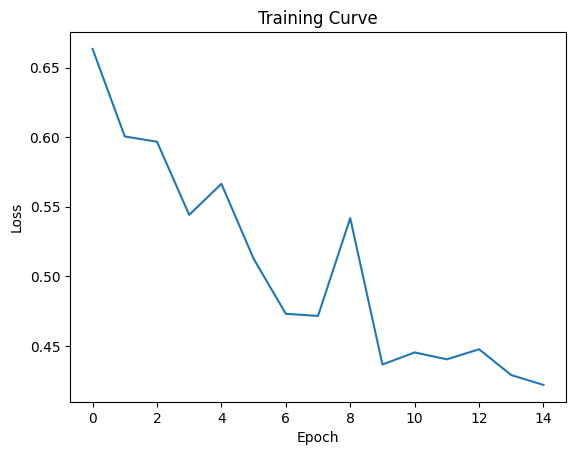

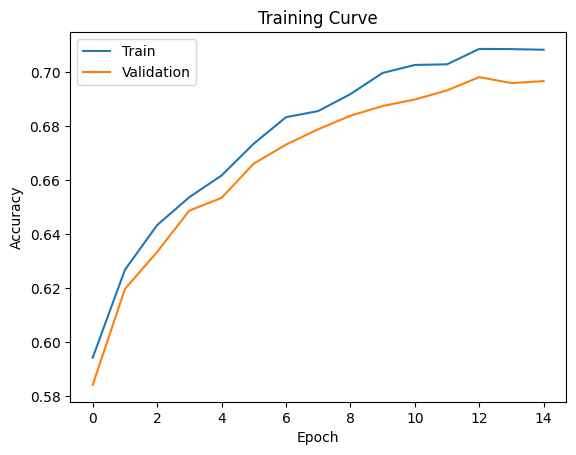

In [21]:
model = SentimentClassifierPooled2(2)
train_model(model, train_data_loader, valid_data_loader, num_epochs=15, learning_rate=1e-5,batch=8)

The values are still fluctuated at the end, it is possible that the batch size is too small, so there's noises when train, so I increased batch size to 10. (due to limited available RAM, I cannot increase batch size any further since it would crash the colab)

In [22]:
# prepare data loaders
MAX_LEN = 150
BATCH_SIZE = 10

#training data
train_data = MovieReviewDataset(reviews=df_train['review'].to_numpy(),
                                targets=df_train['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

train_data_loader = DataLoader(train_data, batch_size = BATCH_SIZE, num_workers = 1) #modify num_works as needed

#validation data

val_data = MovieReviewDataset(reviews=df_val['review'].to_numpy(),
                                targets=df_val['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

valid_data_loader = DataLoader(val_data, batch_size = BATCH_SIZE, num_workers = 1)

#test data
test_data = MovieReviewDataset(reviews=df_test['review'].to_numpy(),
                                targets=df_test['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = 1)

In [23]:
from transformers import BertModel, BertConfig
# save bert output of new train loader
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_outputs = []  # List to store pooled outputs

for i in iter(train_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_outputs.append(output.detach().cpu().numpy())

In [24]:
np.save('pooled_out2.npy', pooled_outputs)    # .npy extension is added if not given
pout2 = np.load('pooled_out2.npy')
pooled_outputs == pout2

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [25]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_out_val = []  # List to store pooled outputs

for i in iter(valid_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_out_val.append(output.detach().cpu().numpy())

In [26]:
np.save('pooled_out_val2.npy', pooled_out_val)    # .npy extension is added if not given
pout_val2 = np.load('pooled_out_val2.npy')
pooled_out_val == pout_val2

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [36]:
def train_model(model, train_loader, valid_loader, num_epochs=5, learning_rate=1e-5,batch=16):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    losses, train_acc, valid_acc = [], [], []
    epochs = []
    for epoch in range(num_epochs):
        i=0
        for k in iter(train_loader):

            # enc = i['input_ids']
            # mask= i['attention_mask']
            labels = k['targets']
            # read bert output from presaved
            out = pout2[i]
            bert_out = torch.from_numpy(out)
            pred = model(bert_out)

            # pred = model(enc,mask)
            optimizer.zero_grad()
            loss = criterion(pred, labels)

            loss.backward()
            optimizer.step()
            i+=1

        losses.append(float(loss))

        epochs.append(epoch)
        train_acc.append(get_accuracy(model, train_loader,pout2))
        valid_acc.append(get_accuracy(model, valid_loader,pout_val2))
        model_path = get_model_name(model.name, batch, learning_rate, epoch)
        torch.save(model.state_dict(), model_path)
        print("Epoch %d; Loss %f; Train Acc %f; Val Acc %f" % (
                epoch+1, loss, train_acc[-1], valid_acc[-1]))

    # plotting
    plt.title("Training Curve")
    plt.plot(losses, label="Train")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    plt.title("Training Curve")
    plt.plot(epochs, train_acc, label="Train")
    plt.plot(epochs, valid_acc, label="Validation")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend(loc='best')
    plt.show()


Epoch 1; Loss 0.542264; Train Acc 0.653600; Val Acc 0.652800
Epoch 2; Loss 0.530313; Train Acc 0.687100; Val Acc 0.676800
Epoch 3; Loss 0.520775; Train Acc 0.697233; Val Acc 0.689600
Epoch 4; Loss 0.546626; Train Acc 0.702033; Val Acc 0.692900
Epoch 5; Loss 0.483614; Train Acc 0.701500; Val Acc 0.690000
Epoch 6; Loss 0.526534; Train Acc 0.705100; Val Acc 0.695000
Epoch 7; Loss 0.492975; Train Acc 0.711500; Val Acc 0.697100
Epoch 8; Loss 0.519688; Train Acc 0.707767; Val Acc 0.695800
Epoch 9; Loss 0.483302; Train Acc 0.710400; Val Acc 0.700500
Epoch 10; Loss 0.533609; Train Acc 0.713567; Val Acc 0.703800
Epoch 11; Loss 0.538986; Train Acc 0.713767; Val Acc 0.702600
Epoch 12; Loss 0.497280; Train Acc 0.713200; Val Acc 0.703000
Epoch 13; Loss 0.518220; Train Acc 0.717533; Val Acc 0.702700
Epoch 14; Loss 0.475291; Train Acc 0.713500; Val Acc 0.699900
Epoch 15; Loss 0.473705; Train Acc 0.711667; Val Acc 0.702200


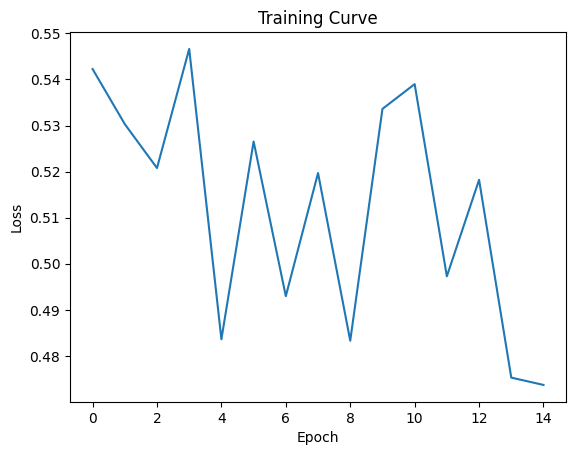

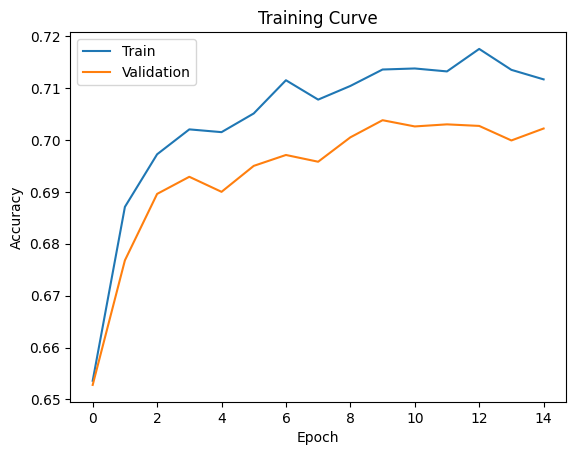

In [37]:
model = SentimentClassifierPooled(2)
train_model(model, train_data_loader, valid_data_loader, num_epochs=15, learning_rate=1e-4,batch=10)

## Part 4. Evaluation [10 pt]

### Part (i) [3pt RESULT]

Report the final test accuracy of your best BERT-based model. Then summarize in a pandas dataframe the accuracy obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.



In [42]:
# prepare data loaders
MAX_LEN = 150
BATCH_SIZE = 8
#test data
test_data = MovieReviewDataset(reviews=df_test['review'].to_numpy(),
                                targets=df_test['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = 2)

In [39]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_out_test = []  # List to store pooled outputs

for i in iter(test_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_out_test.append(output.detach().cpu().numpy())

In [41]:
np.save('pooled_out_test.npy', pooled_out_test)    # .npy extension is added if not given
pout_test = np.load('pooled_out_test.npy')
pooled_out_test == pout_test

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [64]:
# load the best model
model = SentimentClassifierPooled(2)
# information stored at epoch 11
model_path = get_model_name(model.name, batch_size=8, learning_rate=1e-4, epoch=11)
state =torch.load(model_path)
model.load_state_dict(state)



<All keys matched successfully>

In [65]:
# TO BE COMPLETED
correct, total = 0, 0
i=0
for k in iter(test_data_loader):
    labels = k['targets']
    out = pooled_out_test[i]

    bert_out = torch.from_numpy(out)
    output = model(bert_out)


    pred = output.max(1, keepdim=True)[1]

    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
    i+=1

print("test accuray:",correct / total)




test accuray: 0.7127


In [4]:
res_table = pd.DataFrame({'model': ['LSTM', 'BERT-based']})
res_table['batch_size']=[16, 8]
res_table['learning_rate']=[0.0001, 0.0001]
res_table['epoch']=[13, 11]

res_table['training_accuracy']=[0.8798, 0.7241]
res_table['validation_accuracy']=[0.8465, 0.7139]
res_table['test_accuracy']=[0.8406, 0.7127]
res_table

,model,batch_size,learning_rate,epoch,training_accuracy,validation_accuracy,test_accuracy
0,LSTM,16,0.0001,13,0.8798,0.8465,0.8406
1,BERT-based,8,0.0001,11,0.7241,0.7139,0.7127



Model in part A using only LSTM outperforms bert-based model in part B.
Here are some possible reason:

1. Parameters of Bert model are freezed here, the pre-trained model is not built to complete specific sentiment tasks, it may capture useless features that are not useful for sentiment analysis, and LSTM trained completely on this task may outperform bert-based model.
2. Bert is a pre-trained model built on complex text, while sentiment analysis is a much simpler classification task, bert model may be overqualified for a simple task. It may learn in-depth information but ignore some information that are gained in previous layers.

### Part (ii) [2pt RESULT]

Report the false positive rate and false negative rate of your model across the test set. Then summarize in a pandas dataframe the false postive and false negative rate of your model obtained on the training, validation, and test data of your best models from Part A and B.

How does the BERT model compare to the approach in part A using only LSTM? Are the results what you expected? Explain.

In [34]:
model = SentimentClassifierPooled(2)
# information stored at epoch 11
model_path = get_model_name(model.name, batch_size=8, learning_rate=1e-4, epoch=11)
state =torch.load(model_path)
model.load_state_dict(state)

<All keys matched successfully>

In [43]:
# load bert pooled output
pout = np.load('pooled_out.npy')
pout_val = np.load('pooled_out_val.npy')
pout_test = np.load('pooled_out_test.npy')

In [66]:
# TO BE COMPLETED
correct, total = 0, 0
tp, tn, fp, fn = 0, 0, 0, 0
i=0
for k in iter(test_data_loader):
    labels = k['targets']
    out = pooled_out_test[i]

    bert_out = torch.from_numpy(out)
    output = model(bert_out)


    pred = output.max(1, keepdim=True)[1]
    # print(np.transpose(pred.numpy()))
    # print(labels.numpy())
    # print(np.transpose(pred.numpy())==labels.numpy())
    # eq = np.transpose(pred.numpy())==labels.numpy()
    # print(eq.sum())
    # print((torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item())

    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
    i+=1

# # Calculate false positive rate (FPR) and false negative rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)

print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)



False Positive Rate: 0.2524662774310449
False Negative Rate: 0.31770315914961256


In [35]:
tp, tn, fp, fn = 0, 0, 0, 0
i=0
for k in iter(train_data_loader):
    labels = k['targets']
    out = pout[i]

    bert_out = torch.from_numpy(out)
    output = model(bert_out)

    pred = output.max(1, keepdim=True)[1]

    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

    i+=1

# # Calculate false positive rate (FPR) and false negative rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("train:")
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

train:
False Positive Rate: 0.25688195694194493
False Negative Rate: 0.29699273187970926


In [36]:
tp, tn, fp, fn = 0, 0, 0, 0
i=0
for k in iter(valid_data_loader):
    labels = k['targets']
    out = pout_val[i]

    bert_out = torch.from_numpy(out)
    output = model(bert_out)

    pred = output.max(1, keepdim=True)[1]

    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

    i+=1

# # Calculate false positive rate (FPR) and false negative rate (FNR)
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("validation:")
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input 

validation:
False Positive Rate: 0.26421471172962224
False Negative Rate: 0.3090543259557344


In [17]:
# TO BE COMPLETED
model = SentimentRNN(50,80)
# information stored at epoch ..
model_path = get_model_name(model.name, batch_size=16, learning_rate=1e-4, epoch=13)
state =torch.load(model_path)
model.load_state_dict(state)


test_loader = torch.utils.data.DataLoader(test, batch_size=16)

In [18]:
correct, total = 0, 0
tp, tn, fp, fn = 0, 0, 0, 0
for reviews, labels in test_loader:

    output = model(reviews)

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

print("Test accuracy of the best model is:",correct / total*100,"%")
fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("On test data:")
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

Test accuracy of the best model is: 84.06 %
False Positive Rate: 0.16457960644007155
False Negative Rate: 0.15415576574763534


In [21]:
train_loader = torch.utils.data.DataLoader(train, batch_size=16)
tp, tn, fp, fn = 0, 0, 0, 0
for reviews, labels in train_loader:

    output = model(reviews)

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("On train data:")
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

On train data:
False Positive Rate: 0.12941725563408454
False Negative Rate: 0.11098520197307025


In [22]:
valid_loader = torch.utils.data.DataLoader(valid, batch_size=16)
tp, tn, fp, fn = 0, 0, 0, 0
for reviews, labels in valid_loader:

    output = model(reviews)

    pred = output.max(1, keepdim=True)[1]
    correct += pred.eq(labels.view_as(pred)).sum().item()
    total += labels.shape[0]
    tp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(1)).sum().item()
    tn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(0)).sum().item()
    fp += (torch.transpose(pred.eq(1), 0, 1) & labels.eq(0)).sum().item()
    fn += (torch.transpose(pred.eq(0), 0, 1) & labels.eq(1)).sum().item()

fpr = fp / (fp + tn)
fnr = fn / (fn + tp)
print("On validation data:")
print("False Positive Rate:", fpr)
print("False Negative Rate:", fnr)

On validation data:
False Positive Rate: 0.16214041440354054
False Negative Rate: 0.14495923642871347


In [37]:
res_table = pd.DataFrame({'model': ['LSTM', 'BERT-based']})
res_table['False Positive train']=[0.1294, 0.2568]
res_table['False Negative train']=[0.1110, 0.2970]

res_table['False Positive validation']=[0.1621, 0.2642]
res_table['False Negative validation']=[0.1450, 0.3090]

res_table['False Positive test']=[0.1646, 0.2525]
res_table['False Negative test']=[0.1541, 0.3177]
res_table

,model,False Positive train,False Negative train,False Positive validation,False Negative validation,False Positive test,False Negative test
0,LSTM,0.1294,0.111,0.1621,0.145,0.1646,0.1541
1,BERT-based,0.2568,0.297,0.2642,0.309,0.2525,0.3177




1. Both False Positive rate and False Negative rate on train, validation and test data of LSTM model are lower than that of bert-based model, it is what I expected, since LSTM has a higher accuracy across the dataset.
2. LSTM has a higher False Positive rate on all datasets, which means that it performs better on classifing positive sentiment texts. Bert based model has a higher False Negative rate on all datasets, which means that it performs better on classifing negative sentiment texts.

### Part (iii) [3pt DISCUSSION]
Examine some of the misclassified reviews from you best BERT and LSTM models to better identify the differences in the models. Try to provide some justification for any differences in the misclassifications observed in the models.

Is there any part of the review that you could modify to make the classifications correct? Try to make small changes to the review to see if you can make the model make the correct classification while keeping the review as close to the original as possible.

In [73]:
model = SentimentRNN(50,80)
# information stored at epoch ..
model_path = get_model_name(model.name, batch_size=16, learning_rate=1e-4, epoch=13)
state =torch.load(model_path)
model.load_state_dict(state)


test_loader = torch.utils.data.DataLoader(test, batch_size=16)

In [41]:

i=0
cnt = 0
for reviews, labels in test_loader:
    print(reviews)

    output = model(reviews)
    # print(reviews)
    pred = output.max(1, keepdim=True)[1]
    tensorr=pred.eq(labels.view_as(pred))
    ind=torch.where(tensorr == False)[0]
    for ele in ind.tolist():
      print(x_test[ele+i])
      print("True label:",labels[ele])
      print("Prediction:",pred[ele])
      cnt+=1
    if cnt > 20:
      break
    i+=16




("The cast played Shakespeare.<br /><br />Shakespeare lost.<br /><br />I appreciate that this is trying to bring Shakespeare to the masses, but why ruin something so good.<br /><br />Is it because 'The Scottish Play' is my favorite Shakespeare? I do not know. What I do know is that a certain Rev Bowdler (hence bowdlerization) tried to do something similar in the Victorian era.<br /><br />In other words, you cannot improve perfection.<br /><br />I have no more to write but as I have to write at least ten lines of text (and English composition was never my forte I will just have to keep going and say that this movie, as the saying goes, just does not cut it.", 'negative')
True label: tensor(0)
Prediction: tensor([1])
('One of the most significant quotes from the entire film is pronounced halfway through by the protagonist, the mafia middle-man Titta Di Girolamo, a physically non-descript, middle-aged man originally from Salerno in Southern Italy. When we\'re introduced to him at the star

In [62]:
model = SentimentClassifierPooled(2)
# information stored at epoch 11
model_path = get_model_name(model.name, batch_size=8, learning_rate=1e-4, epoch=11)
state =torch.load(model_path)
model.load_state_dict(state)
MAX_LEN = 150
BATCH_SIZE = 8
#test data
test_data = MovieReviewDataset(reviews=df_test['review'].to_numpy(),
                                targets=df_test['sentiment'].to_numpy(),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = 2)

In [71]:
i=0
ii=0
cnt = 0
for k in iter(test_data_loader):

    labels = k['targets']
    out = pout_test[i]
    bert_out = torch.from_numpy(out)
    output = model(bert_out)
    pred = output.max(1, keepdim=True)[1]

    tensorr=pred.eq(labels.view_as(pred))
    ind=torch.where(tensorr == False)[0]
    for ele in ind.tolist():
      print(test_data[ele+ii]['review_text'])
      print("True label:",labels[ele])
      print("Prediction:",pred[ele])
      cnt+=1
    if cnt > 20:
      break
    ii+=8

I really like Kinski he is a great actor. I've seen this movie because I've heard that there are autobiographic aspects in this movie.<br /><br />The film is full of symbols like a piano sinking in a river or strange shadow-pictures at the walls. Then the narrator always says abstract sentences like: "A kid sells fortune, but her box is empty now." This is really disturbing and wasn't really necessary, because everyone understands what this movie is all about. The movie shows how Kinski's character treated woman, and how he kept them under control. If there are really some aspects of Kinski's life in this story - then he really was an swine. So there is no need to watch this movie, unless if you want to see Kinski naked or if you like sick trash movies to laugh about.
True label: tensor(0)
Prediction: tensor([1])
Sunny, a cocktail waitress in the D.C. area, is a bit dim, to put in mildly. She drives an old clunker and rents a tiny room from a gay male couple. However, she saves the lif

In [58]:
from scipy.special import softmax
review = "These series however, are well played, the story follows through all episodes and even if you miss one, the story will still be catching your mind.<br /><br />The episodes are all filmed on a hospital and takes you further and further in to the mysteries of dark and old secrets that lies just beneath the surface of the mighty hospital."
r_encoded, _ = tokenize([review], [0], stoi)
r_pad = padding_(r_encoded, 500)
# get output from preprocessed review
output = model(torch.tensor(r_pad))
# calculate probability by softmax
print("probability to positive:",softmax((output[0]).detach().numpy())[1])
# prediction
pred = output.max(1, keepdim=True)[1]
print("label:",pred[0].numpy()[0])

probability to positive: 0.9277127
label: 1


In [75]:
review = 'on second viewing, a genuinely insightful and quite satisfying presentation.<br /><br />Spoiler of sorts follows.<br /><br />we were at first caught up in what seemed a really beautiful and romantic story only to be led back and forth into the dark reality of mismatch. These two guys just didn\'t belong together from their first ambiguous encounter. As much as Mathieu and Cedric were sexually attracted to each other, the absence of a deeper emotional tie made it impossible for Mathieu, an intellectual being, to find fulfillment in sharing life with someone whose sensibilities were more attuned to carnival festivities and romps on the beach.<br /><br />On a purely technical note, I loved the camera action in this film. Subtitles were totally unnecessary, even though my French is "presque rien." I could watch it again without the annoying English translation and enjoy it even more. This was a polished, very professionally made motion picture. Though many scenes seem superfluous, I rate it nine out of ten.'
r_encoded, _ = tokenize([review], [0], stoi)
r_pad = padding_(r_encoded, 500)
# get output from preprocessed review
output = model(torch.tensor(r_pad))
# calculate probability by softmax
print("probability to positive:",softmax((output[0]).detach().numpy())[1])
# prediction
pred = output.max(1, keepdim=True)[1]
print("label:",pred[0].numpy()[0])

probability to positive: 0.8102422
label: 1



**Answer:**

In many of the misclassified text by LSTM, there are a turning point of the review, in the below two examples, the author first talked about negative sides and then positive sides of the movie. While the model fails to recognize the emphased point of the review.

In many of the misclassified text by bert, there are a large piece of the text talking about concrete details of the movie, specifically, the author talked about horrible themes in the movie, but the author consider it a good movie, while bert model capture the words that decribe details of the movie, but not the actual comment of the author.


Then I tried to modify the reviews to make the prediction right.
For the first one, I deleted the first sentence of the review before the turning point, and the probability to positive is very high: 0.9, the output is correct.

For the second one, I deleted the first sentense of the review and the first sentence decribing the poor leading character of the movie, and the output is correct.

**Below are two of the example that LSTM model misclassified.**

("Normally I don't like series at all. They're all to predictable and they tend to become boring and dull very fast.<br /><br />These series however, are well played, the story follows through all episodes and even if you miss one, the story will still be catching your mind.<br /><br />The episodes are all filmed on a hospital and takes you further and further in to the mysteries of dark and old secrets that lies just beneath the surface of the mighty hospital.", 'positive')
True label: tensor(1)
Prediction: tensor([0])

('What seemed at first just another introverted French flick offering no more than baleful sentiment became for me, on second viewing, a genuinely insightful and quite satisfying presentation.<br /><br />Spoiler of sorts follows.<br /><br />Poor Cedric; he apparently didn\'t know what hit him. Poor audience; we were at first caught up in what seemed a really beautiful and romantic story only to be led back and forth into the dark reality of mismatch. These two guys just didn\'t belong together from their first ambiguous encounter. As much as Mathieu and Cedric were sexually attracted to each other, the absence of a deeper emotional tie made it impossible for Mathieu, an intellectual being, to find fulfillment in sharing life with someone whose sensibilities were more attuned to carnival festivities and romps on the beach.<br /><br />On a purely technical note, I loved the camera action in this film. Subtitles were totally unnecessary, even though my French is "presque rien." I could watch it again without the annoying English translation and enjoy it even more. This was a polished, very professionally made motion picture. Though many scenes seem superfluous, I rate it nine out of ten.', 'positive')
True label: tensor(1)
Prediction: tensor([0])

**Below are two of the example that bert model misclassified.**

The latest film by the Spanish director Agusti Villaronga is a study on how children that experience violence and isolation within their remote community, develop into troubled young adults that need certain psychic tools to deal with their hidden mental frailty. Whether these tools are religion followed to a fanatical level, caring for others or simply putting on a macho image whilst engaging as a male-prostitute, Villaronga creates a successful examination of how these vices affect three teenagers living in Spain under Franco. The three witness the disturbing double death or their friends before they are teenagers and subsequently bury the emotions they feel with their peers frail corpses until they meet again once more at a hospital for those suffering form tuberculosis.<br /><br />The cinematic style of the text is typically visually opulent as you would expect from the Spanish auteur and is extremely reminiscent of fellow Spaniard Pedro Almodovar's work with themes dealing with sexual desire, both heterosexual and homosexual. An element that is different between the two directors is that Villaronga favours a supernatural undertone spliced with claustrophobic, gritty realism opposed to Almodovar's use of surrealism, although both styles are similar.<br /><br />The piece gives an insight into troubled young psyche and contains disturbing violence and scenes of a sexual nature. I highly recommend watching this film as it contains elements that will remain with the audience for a considerable period after viewing.
True label: tensor(1)
Prediction: tensor([0])

This movie is about a group of four friends who wreck a car while driving. They build a campfire to get though the night and wait for help. To pass the time, they tell each other scary stories. To tell about it would ruin the movie, so rent and enjoy it!!<br /><br />I will say it starts out a little slow, but each tale get better and better. This movie stars some of today's hottest actors Christine Taylor(The Brady Bunch Movies), James Marsden(Disturbing Behavior) and Ron Livingston (Office Space). So you can see there are big name stars just not the really big ones!!GO rent or buy it ASAP !!This movie is awesome!!
True label: tensor(1)
Prediction: tensor([0])



### Part (iv) [2pt DISCUSSION]
Find 5 samples of positive and negative reviews on IMDB that were posted recently and evaluate them with your best BERT and LSTM models from parts A and B. How well do they perform?

In [78]:
# TO BE COMPLETED
label5=[1,0,1,0,0]
review1="Engaging and watchable 4 part series telling the tale of a blind French girl, a German soldier/radio operator and, somewhat loosely, the French resistance during WW2 in occupied St Malo in France. Good cast, Hugh Laurie as ever excellent but not convinced Mark Ruffalo was right for his part, some slightly odd accents going on there! Along with the great cast, good cinematography, pacing and dialogue make the whole thing work well if not exactly standout. Just think maybe it could/should have had more of a European feel about it considering the subject matter. Still, it's far from the worst thing Netflix has put out..."
review2="The magnificent, intricate and detailed Pulitzer winning book has been adapted into a 4hours mediocre movie split in 4parts. The 70% of the book is there lives more before and how they collide as it goes through different timelines. The series focused on only 30% of the book and used few flashbacks, giving as viewers no connection to any of the characters. We know it is set during WWII and Holocaust but the director never took us deep into how they end up there. They acted as if, well You know the story, Don't You!!! French and Germans interacting in English would have made sense but Germans n French are speaking in English to eachother while actors are from these countries just felt like a lazy approach to what could have been a brilliant story.You have a director of Night at the Museum and The Pink Panther; a comedy director directing a serious story like this speaks volume of how much Netflix cares. This is another prime example of how Netflix never cared for the Art or the medium itself, it's just another thing on their weekly calendar. That is why no-one remembers anything on Netflix or talks about it in years to come."
review3="This is my all time favorite book and I loved the mini series! As the director, Shawn Levy said The book is the mountain. The mountain will always exist. Long after us, the mountain will be here. We did a painting of that mountain. We're not trying to replace it. We're not trying to make a photograph or a Xerox. It is our impression of that mountain. He also says the heart of the story in both its ideas and characters are faithful to Anthony Doerr's creation, he continued. To have Anthony be as thrilled as he is with this finished product of the series, that is the most gratifying thing that's happened. I encourage you to read his interview on deadline.com. It will give you great insight into this amazing work! I particularly love how he selected the actresses who played Marie-Laure! I loved the book and the mini series!"

review4="As a fan of the WWII genre and Louis Hofmann from Dark I was looking forward to this series, but I was terribly disappointed, except by Hofmann's performance. Loberti in herself was great, except her character cast in the most unlikely story. Movies don't have to be war documentaries, but there is only as much trivialism that we can bear on both sides, the villains and the good. The constant compassion-baiting characters become at some point unbearable in their good and bad deeds. We see a French Resistance entirely recomposed of the aging, the impaired, the frail and the sick from the modern-day garden variety of the marginalized from the screen. The producers never neglect gender parity in the main character duo, down to the resistance committee, except of course, among the Germans, who are only villain men. The classical figure of the good within the evil in Hoffmann ends up in a caricature, but at least Hoffmann is superbly good-looking. And finally, the villain pursuing the crystal at the centre of the story adds a Harry Potter more than Indiana Jones flair. I wondered at times what is the target age-group of this series, children?"
review5="I haven't written a review in this website for years, but I am extremely disappointed. A- half, maybe more, of the plot was just erased in the show. Netflix, if you already made a limited-series you can at least delay on the important details. For example, the protagonists' lives before the crucial day on 1944. By the way, in times where the charactes should've been the age of 10-14 they just showed the same actors in their 30s- would it be too much to hire actual children to portray these characters (Marie and Werner) in that time? B- they changed the ending COMPLETELY. The ending was so beautiful and human and they just ignored it bluntly. C- It would have been nice if they gave up on famous names and just film it in German and French languages. It's 2023, viewers are not afraid to read subtitles anymore. It'd give the story much more authenticity. Seeing them talk in English about french/german accents was weird. And I guess Netflix did that to gain more views. D- Key characters were erased/reduced. Instead, unnecessary scenes took place, to add to the action (I presume). Anyway, very disappointing. If you're a fan of the novel I suggest you step away from this show."

In [86]:
review = "These series however, are well played, the story follows through all episodes and even if you miss one, the story will still be catching your mind.<br /><br />The episodes are all filmed on a hospital and takes you further and further in to the mysteries of dark and old secrets that lies just beneath the surface of the mighty hospital."
r_encoded, _ = tokenize([review1,review2,review3,review4,review5], label5, stoi)
r_pad = padding_(r_encoded, 500)
# get output from preprocessed review
output = model(torch.tensor(r_pad))

# prediction
pred = output.max(1, keepdim=True)[1]
print("true label:",label5)
print("prediction:",np.transpose(pred.numpy()))

true label: [1, 0, 1, 0, 0]
prediction: [[1 0 1 0 0]]


In [91]:
np.array(label5)

array([1, 0, 1, 0, 0])

In [92]:
model = SentimentClassifierPooled(2)
# information stored at epoch 11
model_path = get_model_name(model.name, batch_size=8, learning_rate=1e-4, epoch=11)
state =torch.load(model_path)
model.load_state_dict(state)
MAX_LEN = 150
BATCH_SIZE = 8
#test data
test_data = MovieReviewDataset(reviews=np.array([review1,review2,review3,review4,review5]),
                                targets=np.array(label5),
                                tokenizer=tokenizer,
                                max_len=MAX_LEN)

test_data_loader = DataLoader(test_data, batch_size = BATCH_SIZE, num_workers = 2)

In [93]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

pooled_out_new = []

for i in iter(test_data_loader):
    enc = i['input_ids']
    mask = i['attention_mask']
    labels = i['targets']


    # Forward pass
    output = bert_model(enc, mask)[1]

    # Save the pooled output
    pooled_out_new.append(output.detach().cpu().numpy())

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


In [96]:


for k in iter(test_data_loader):

    labels = k['targets']
    out = pooled_out_new[i]
    bert_out = torch.from_numpy(out)
    output = model(bert_out)
    pred = output.max(1, keepdim=True)[1]

    print("true label:",label5)
    print("prediction:",np.transpose(pred.numpy()))




/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:2614: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


true label: [1, 0, 1, 0, 0]
prediction: [[1 1 1 1 0]]


I go to the IMDB website to take down some recent user review about a recent movie "All the Light We Cannot See (2023)".
Resource link: https://www.imdb.com/title/tt15320362/reviews/?ref_=tt_ql_2

LSTM model correctly classify all of the 5 reviews, while bert-based model misclassify 2 of the negative reivews.

# PART C (Optional) - Bonus Challenge!

This is an optional exercise for those that finish the assignment early and would like to take on a challenging task.

In part A we constructed and trained an LSTM model to identify the sentiment in movie reviews. In Part B we used the embeddings of a BERT model pretrained on a large corpus of text to demonstrate how transfer learning can be used to improve our movie sentiment model. The BERT model is one of many language models that we could have used to implement transfer learning.

For this bonus challenge you are asked to implement a generative character-level LSTM model to produce IMDB movie reviews. Once the model is sufficiently trained you can then use its hidden states as the embedding for training a movie sentiment model. Construct your new movie sentiment analysis model and compare the performance against the model from part A and B.

There are many variants of a generative LSTM model that you can consider. As a starting point you can use the generative LSTM sample code provided in the lecture notes. Specifically, the one used to generate Shakeaspeare. More advanced versions of a generative LSTM can be found in the Universal Language Model Fine-turing for Text Classification (ULMfit) paper (https://arxiv.org/abs/1801.06146).

Tasks:

1. Create a generative character-level LSTM model trained to create IMDB reviews
2. Create a classifier using the embeddings from the generative LSTM model (from step 1) to identify positive and negative reviews.
3. Compare the performance of the model with the results in parts A and B of the assignment.
4. Upgrade the generative LSTM model using the techniques listed in the ULMfit paper (e.g., bi-directional LSTM, pretraining with wikipedia text and fine-tuning on IMDBT reviews, etc.).

Bonus marks will be provided based on the number of steps completed. Summarize below your results and anything intersting you learned from the steps that you completed. Bonus marks cannot be accumulated beyond a maximum assignment grade.


In [3]:
# TO BE COMPLETED
text = df['review'][:10000].str.cat(sep='\n')

chars = tuple(set(text))

int2char = dict(enumerate(chars))

char2int = {ch: ii for ii, ch in int2char.items()}

encoded = np.array([char2int[ch] for ch in text])

text[:100]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. The"

In [4]:
def one_hot_encode(arr, n_labels):

    # Initialize the the encoded array
    one_hot = np.zeros((np.multiply(*arr.shape), n_labels), dtype=np.float32)

    # Fill the appropriate elements with ones
    one_hot[np.arange(one_hot.shape[0]), arr.flatten()] = 1.

    # Finally reshape it to get back to the original array
    one_hot = one_hot.reshape((*arr.shape, n_labels))

    return one_hot

In [5]:
def get_batches(arr, n_seqs, n_steps):
    '''Create a generator that returns batches of size
       n_seqs x n_steps from arr.

       Arguments
       ---------
       arr: Array you want to make batches from
       n_seqs: Batch size, the number of sequences per batch
       n_steps: Number of sequence steps per batch
    '''

    batch_size = n_seqs * n_steps
    n_batches = len(arr)//batch_size

    # Keep only enough characters to make full batches
    arr = arr[:n_batches * batch_size]

    # Reshape into n_seqs rows
    arr = arr.reshape((n_seqs, -1))

    for n in range(0, arr.shape[1], n_steps):

        # The features
        x = arr[:, n:n+n_steps]

        # The targets, shifted by one
        y = np.zeros_like(x)

        try:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, n+n_steps]
        except IndexError:
            y[:, :-1], y[:, -1] = x[:, 1:], arr[:, 0]
        yield x, y

In [6]:
class CharRNN(nn.Module):

    def __init__(self, tokens, n_steps=100, n_hidden=256, n_layers=2,
                               drop_prob=0.5, lr=0.001):
        super().__init__()
        self.drop_prob = drop_prob
        self.n_layers = n_layers
        self.n_hidden = n_hidden
        self.lr = lr

        # Creating character dictionaries
        self.chars = tokens
        self.int2char = dict(enumerate(self.chars))
        self.char2int = {ch: ii for ii, ch in self.int2char.items()}

        ## Define the LSTM
        self.lstm = nn.LSTM(len(self.chars), n_hidden, n_layers,
                            dropout=drop_prob, batch_first=True)

        ## Define a dropout layer
        self.dropout = nn.Dropout(drop_prob)

        ## Define the final, fully-connected output layer
        self.fc = nn.Linear(n_hidden, len(self.chars))

        # Initialize the weights
        self.init_weights()


    def forward(self, x, hc):
        ''' Forward pass through the network.
            These inputs are x, and the hidden/cell state `hc`. '''

        ## Get x, and the new hidden state (h, c) from the lstm
        x, (h, c) = self.lstm(x, hc)

        ## Pass x through the dropout layer
        x = self.dropout(x)

        # Stack up LSTM outputs using view
        #x = x.view(x.shape()[0]*x.shape()[1], self.n_hidden)
        #x = x.view(12800, self.n_hidden)
        # x = torch.reshape(x, (12800,self.n_hidden))
        # print(x.shape) # 128,100,512
        x = torch.reshape(x, (1,self.n_hidden))

        ## Put x through the fully-connected layer
        x = self.fc(x)

        # Return x and the hidden state (h, c)
        return x, (h, c)


    def predict(self, char, h=None, cuda=False, top_k=None):
        ''' Given a character, predict the next character.

            Returns the predicted character and the hidden state.
        '''
        if cuda:
            self.cuda()
        else:
            self.cpu()

        if h is None:
            h = self.init_hidden(1)

        x = np.array([[self.char2int[char]]])
        x = one_hot_encode(x, len(self.chars))

        inputs = torch.from_numpy(x)

        if cuda:
            inputs = inputs.cuda()

        h = tuple([each.data for each in h])
        out, h = self.forward(inputs, h)

        p = F.softmax(out, dim=1).data

        if cuda:
            p = p.cpu()

        if top_k is None:
            top_ch = np.arange(len(self.chars))
        else:
            p, top_ch = p.topk(top_k)
            top_ch = top_ch.numpy().squeeze()

        p = p.numpy().squeeze()

        char = np.random.choice(top_ch, p=p/p.sum())

        return self.int2char[char], h

    def init_weights(self):
        ''' Initialize weights for fully connected layer '''
        initrange = 0.1

        # Set bias tensor to all zeros
        self.fc.bias.data.fill_(0)
        # FC weights as random uniform
        self.fc.weight.data.uniform_(-1, 1)

    def init_hidden(self, n_seqs):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x n_seqs x n_hidden,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        return (weight.new(self.n_layers, n_seqs, self.n_hidden).zero_(),
                weight.new(self.n_layers, n_seqs, self.n_hidden).zero_())

In [7]:
def train(net, data, epochs=10, n_seqs=10, n_steps=50, lr=0.001, clip=5, val_frac=0.1, cuda=False, print_every=10):
    ''' Training a network

        Arguments
        ---------

        net: CharRNN network
        data: text data to train the network
        epochs: Number of epochs to train
        n_seqs: Number of mini-sequences per mini-batch, aka batch size
        n_steps: Number of character steps per mini-batch
        lr: learning rate
        clip: gradient clipping
        val_frac: Fraction of data to hold out for validation
        cuda: Train with CUDA on a GPU
        print_every: Number of steps for printing training and validation loss

    '''

    net.train()

    opt = torch.optim.Adam(net.parameters(), lr=lr)

    criterion = nn.CrossEntropyLoss()

    # create training and validation data
    val_idx = int(len(data)*(1-val_frac))
    data, val_data = data[:val_idx], data[val_idx:]

    if cuda:
        net.cuda()

    counter = 0
    n_chars = len(net.chars)

    for e in range(epochs):

        h = net.init_hidden(n_seqs)

        for x, y in get_batches(data, n_seqs, n_steps):

            counter += 1

            # One-hot encode our data and make them Torch tensors
            x = one_hot_encode(x, n_chars)
            inputs, targets = torch.from_numpy(x), torch.from_numpy(y)

            if cuda:
                inputs, targets = inputs.cuda(), targets.cuda()

            # Creating new variables for the hidden state, otherwise
            # we'd backprop through the entire training history
            h = tuple([each.data for each in h])

            net.zero_grad()

            output, h = net.forward(inputs, h)

            loss = criterion(output, targets.view(n_seqs*n_steps).type(torch.cuda.LongTensor))

            loss.backward()

            # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
            nn.utils.clip_grad_norm_(net.parameters(), clip)

            opt.step()

            if counter % print_every == 0:

                # Get validation loss
                val_h = net.init_hidden(n_seqs)
                val_losses = []

                for x, y in get_batches(val_data, n_seqs, n_steps):

                    # One-hot encode our data and make them Torch tensors
                    x = one_hot_encode(x, n_chars)
                    x, y = torch.from_numpy(x), torch.from_numpy(y)

                    # Creating new variables for the hidden state, otherwise
                    # we'd backprop through the entire training history
                    val_h = tuple([each.data for each in val_h])

                    inputs, targets = x, y
                    if cuda:
                        inputs, targets = inputs.cuda(), targets.cuda()

                    output, val_h = net.forward(inputs, val_h)
                    val_loss = criterion(output, targets.view(n_seqs*n_steps).type(torch.cuda.LongTensor))

                    val_losses.append(val_loss.item())

                print("Epoch: {}/{}...".format(e+1, epochs),
                      "Step: {}...".format(counter),
                      "Loss: {:.4f}...".format(loss.item()),
                      "Val Loss: {:.4f}".format(np.mean(val_losses)))


In [8]:
batches = get_batches(encoded, 10, 50)
x, y = next(batches)
print(x.shape, y.shape)

(10, 50) (10, 50)


In [15]:
n_seqs, n_steps = 128, 100
net = CharRNN(chars, n_hidden=512, n_layers=2)
train(net, encoded, epochs=25, n_seqs=n_seqs, n_steps=n_steps, lr=0.001, cuda=True, print_every=10)

Epoch: 1/25... Step: 10... Loss: 3.4901... Val Loss: 3.4771
Epoch: 1/25... Step: 20... Loss: 3.3449... Val Loss: 3.3349
Epoch: 1/25... Step: 30... Loss: 3.2272... Val Loss: 3.2170
Epoch: 1/25... Step: 40... Loss: 3.1157... Val Loss: 3.0892
Epoch: 1/25... Step: 50... Loss: 2.9767... Val Loss: 2.9302
Epoch: 1/25... Step: 60... Loss: 2.8069... Val Loss: 2.7866
Epoch: 1/25... Step: 70... Loss: 2.6907... Val Loss: 2.6933
Epoch: 1/25... Step: 80... Loss: 2.6085... Val Loss: 2.6243
Epoch: 1/25... Step: 90... Loss: 2.5287... Val Loss: 2.5686
Epoch: 1/25... Step: 100... Loss: 2.5799... Val Loss: 2.5267
Epoch: 1/25... Step: 110... Loss: 2.4985... Val Loss: 2.4899
Epoch: 1/25... Step: 120... Loss: 2.4397... Val Loss: 2.4574
Epoch: 1/25... Step: 130... Loss: 2.3922... Val Loss: 2.4249
Epoch: 1/25... Step: 140... Loss: 2.4022... Val Loss: 2.3971
Epoch: 1/25... Step: 150... Loss: 2.3445... Val Loss: 2.3742
Epoch: 1/25... Step: 160... Loss: 2.3551... Val Loss: 2.3489
Epoch: 1/25... Step: 170... Loss:

In [16]:
model_name = 'rnn_IMDB.net'

checkpoint = {'n_hidden': net.n_hidden,
              'n_layers': net.n_layers,
              'state_dict': net.state_dict(),
              'tokens': net.chars}

with open(model_name, 'wb') as f:
    torch.save(checkpoint, f)

In [9]:
#load saved model
net = CharRNN(chars, n_hidden=512, n_layers=2)
#opt = torch.optim.Adam(net.parameters(), lr=lr)

checkpoint = torch.load('rnn_IMDB.net')
net.load_state_dict(checkpoint['state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
#epoch = checkpoint['epoch']
#loss = checkpoint['loss']

net.eval()

CharRNN(
  (lstm): LSTM(165, 512, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=512, out_features=165, bias=True)
)

In [10]:
def sample(net, size, prime='The', top_k=None, cuda=False):

    if cuda:
        net.cuda()
    else:
        net.cpu()

    net.eval()

    # First off, run through the prime characters
    chars = [ch for ch in prime]

    h = net.init_hidden(1)

    for ch in prime:
        char, h = net.predict(ch, h, cuda=cuda, top_k=top_k)

    chars.append(char)

    # Now pass in the previous character and get a new one
    for ii in range(size):

        char, h = net.predict(chars[-1], h, cuda=cuda, top_k=top_k)
        chars.append(char)

    return ''.join(chars)

In [11]:
print(sample(net, 2000, prime='This', top_k=5, cuda=True))

This§/\h=\â=Wj*üâW?(\üWqq*=É:j\â=\L:\â▼q\â(\=W\*\(LWõ\*=É\L:\â(\(?w:jâWj\L*=\*▼(W\(L:\â(\=W\*\:\âq:(õ\Y?\LW:t:j///*=É\â\â(\(W\q?üL\W\*\â▼q\L*\j?▼Ï\(LW(\L*\Lâ(\qWtâ:\*(\q:*=\W\Y:\(:=\*=É\â=\*=\âq*´:\*\*=Ï\q*(:j\W\LWjjWjõ\LâüLõ\*=É\LW(:\*j\W\j?:\*üWj(\Y:â=´\*üü:w:É\*=É\É:ü:wât:õ\L:\(üjâw\â(\*\q:ÉâWüj:\*=´:É\W\*\(Wj\W\(:=(:\W\(üj::=\wWâ=\W\*\LjW\W?\*(\L:Ï\L*É\*\üjâq:\W\(:jt:\*\(?wâÉ\*=Éõ\L:\*=É\(â=2\L*\L:\ÉâÉ=5\(:\*=É\L*t:\(Wq:\ü▼:t:j\üW▼W?jõ\*=ÏL:j:\â=\*=\?(â=´\*üWj\*(\L:5(\*▼▼\(::=\*(\L:\w*j*=WâÉ\Lâ=´(\âLW?\*\(?wâÉ\q*=\â(\*=\Wjâ´â=*▼õ\Y:▼â:t*Y▼:\*=É\Éâ(*wwWâ=â=´/\h▼(W\*▼:j=*ât:\â(\*YWt:\Lâ(\*L:j5(\üWqq:=*jÏ\W=\L:\(LW/\DLâ▼:\Lâ(\wjWY▼:q\*(\*\Y:*?â?▼\(ü:=:\L:j:\L:\*(\W*▼▼Ï\(*Ïâ=´ð\r5q\=W\(*Ïâ=´\L:\(LW\*=É\L:\üL*j*ü:j(\L*t:\Lâ(\qWj:\**üLâ=´õ\YW?\âqwjâ(W=:É\*=É\(?üü:((?▼\*=É\j?▼Ï\*YW?\L:\(?Y½:ü\W\L:\üL*j*ü:j\:▼▼â=´\L:\(üj::=\*=É\(Wq:\üL:ü2\W=\Lâ(\(üj*üL/\äL:\wj:(:=\W\L:\qW(\â=:j:(â=´\ü

In [ ]:
'''
Task1:
The generator is producing messy code, we may need more time and more epochs
to improve it.



'''

### Saving to HTML
Detailed instructions for saving to HTML can be found <a href="https://stackoverflow.com/questions/53460051/convert-ipynb-notebook-to-html-in-google-colab/64487858#64487858">here</a>. Provided below are a summary of the instructions:

(1) download your ipynb file by clicking on File->Download.ipynb

(2) reupload your file to the temporary Google Colab storage (you can access the temporary storage from the tab to the left)

(3) run the following:

In [ ]:
#!pip install nbconvert

%%shell
jupyter nbconvert --to html /content/A4.ipynb


[NbConvertApp] Converting notebook /content/A4.ipynb to html
[NbConvertApp] Writing 679783 bytes to /content/A4.html


(4) the html file will be available for download in the temporary Google Colab storage

(5) review the html file and make sure all the results are visible before submitting your assignment to Quercus

# Assignment Grading Rubric
The grading of the assignment will be based on the following categories:

(1) **10 Pt - EXPLORATORY QUESTIONS** These are basic questions that in most cases can be answered without requiring a fully working and trained neural network model. For example, data loading, processing and visualization, summary statistics, data exploration, model and training setup, etc.

(2) **10 Pt - MODEL** Student has successfully implemented all the required neural network models and has demonstrated successful training of the model without any errors.

(3) **10 Pt - RESULT** Students are evaluated based on the results achieved in comparison to the expected results of the assignment.

(4) **10 Pt - DISCUSSION QUESTIONS** Student demonstrated understanding beyond the basic exploratory questions, can answer some of the more challenging questions, and provide arguments for their model selection decisions.

(5) **10 Pt - COMMUNICATION** Student has provided a quality submission that is easy to read without too many unnecessary output statements that distract the reading of the document. The code has been well commented and all the answers are communicated clearly and concisely.

(6) **10 Pt - BONUS** Student has completed the assignment and has taken on the challenging bonus tasks listed in PART C. The student has demonstrated a good understanding of all aspects of the assignment and has exceeded expectations for the assignment.



**TOTAL GRADE = _____ of 50 Pts**